In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [7]:
lat_choices = ["data_gan_small_net_lat_100.csv", "data_gan_small_net_lat_70.csv", "data_gan_small_net_lat_50.csv", "data_gan_small_net_lat_33.csv", "data_gan_small_net_lat_20.csv", "data_gan_small_net_lat_10.csv"]

In [8]:
df_real_swipes = pd.read_csv("data_real.csv", header=None)
df_real_swipes

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.837046,0.991429,0.336088,0.694478,0.873457,0.0,0.0,0.093993,0.312665,0.941490,...,0.083595,0.911749,0.013109,0.001351,0.764706,0.3,0.413984,0.091654,0.021079,0.166667
1,0.260844,0.891429,0.292011,0.583961,0.907407,0.0,0.0,0.157348,0.133933,0.965653,...,0.052348,0.907437,0.003891,0.000368,0.911765,0.1,0.302011,0.000274,0.000000,0.000000
2,0.129543,0.897143,0.297521,0.252409,0.645062,0.0,0.0,0.102679,0.191747,0.878369,...,0.049499,0.855420,0.047430,0.006368,0.941176,0.2,0.279285,0.000218,0.000000,0.083333
3,0.170574,0.814286,0.391185,0.665007,0.799383,0.0,0.0,0.103792,0.190497,0.921675,...,0.062237,0.921922,0.022604,0.002525,0.705882,0.1,0.252015,0.138000,0.037173,0.166667
4,0.092614,0.757143,0.517906,0.872486,0.838744,0.0,0.0,0.112382,0.219563,0.860694,...,0.182462,0.930668,0.122483,0.024799,0.558824,0.2,0.259287,0.320831,0.136388,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.133646,0.748571,0.242424,0.937616,0.743827,0.0,0.0,0.233887,0.134728,0.825052,...,0.325571,0.893084,0.198659,0.053976,0.294118,0.9,0.731972,0.619999,0.420378,0.833333
116,0.140094,0.694286,0.264463,0.482744,0.837394,0.0,0.0,0.237107,0.177626,0.914083,...,0.196760,0.975855,0.103947,0.019295,0.647059,0.4,0.496149,0.236033,0.083432,0.416667
117,0.038101,0.688571,0.460055,0.797628,0.824074,0.0,0.0,0.400083,0.420035,0.873266,...,0.235891,0.859251,0.374860,0.161880,0.441177,0.3,0.242099,0.533635,0.322772,0.416667
118,0.010551,0.974286,0.297521,0.576593,0.932099,0.0,0.0,0.488499,0.477411,0.953216,...,0.540807,0.941455,0.390293,0.174019,0.911765,0.4,0.483813,0.150095,0.042001,0.500000


In [9]:
df_real_long = df_real_swipes.melt()
df_real_long

,variable,value
0,0,0.837046
1,0,0.260844
2,0,0.129543
3,0,0.170574
4,0,0.092614
...,...,...
3955,32,0.833333
3956,32,0.416667
3957,32,0.416667
3958,32,0.500000


In [10]:
df_16_features_choices = []

for lat_choice in lat_choices:
    df_gan_swipes = pd.read_csv(lat_choice, header=None)

    df_gan_long = df_gan_swipes.melt()
    df_gan_long['variable'] += 0.5
    
    df_long = pd.concat([df_real_long, df_gan_long], ignore_index=True)
    df_long_first_16_features = df_long[df_long["variable"] < 17]
    df_long_first_16_features = df_long_first_16_features.sort_values(by="variable")
    df_long_last_16_features = df_long[df_long["variable"] >= 17]
    df_long_last_16_features = df_long_last_16_features.sort_values(by="variable")
    df_16_features_choices.append([df_long_first_16_features, df_long_last_16_features])

In [11]:
def plot_lat_choice(dataframe):
    f, ax = plt.subplots(1,1,figsize=(9.5,8))
    plt.xticks(rotation=90)
    ax = sns.boxplot(data=dataframe, x="variable", y="value")
    plt.tight_layout()

<IPython.core.display.Javascript object>


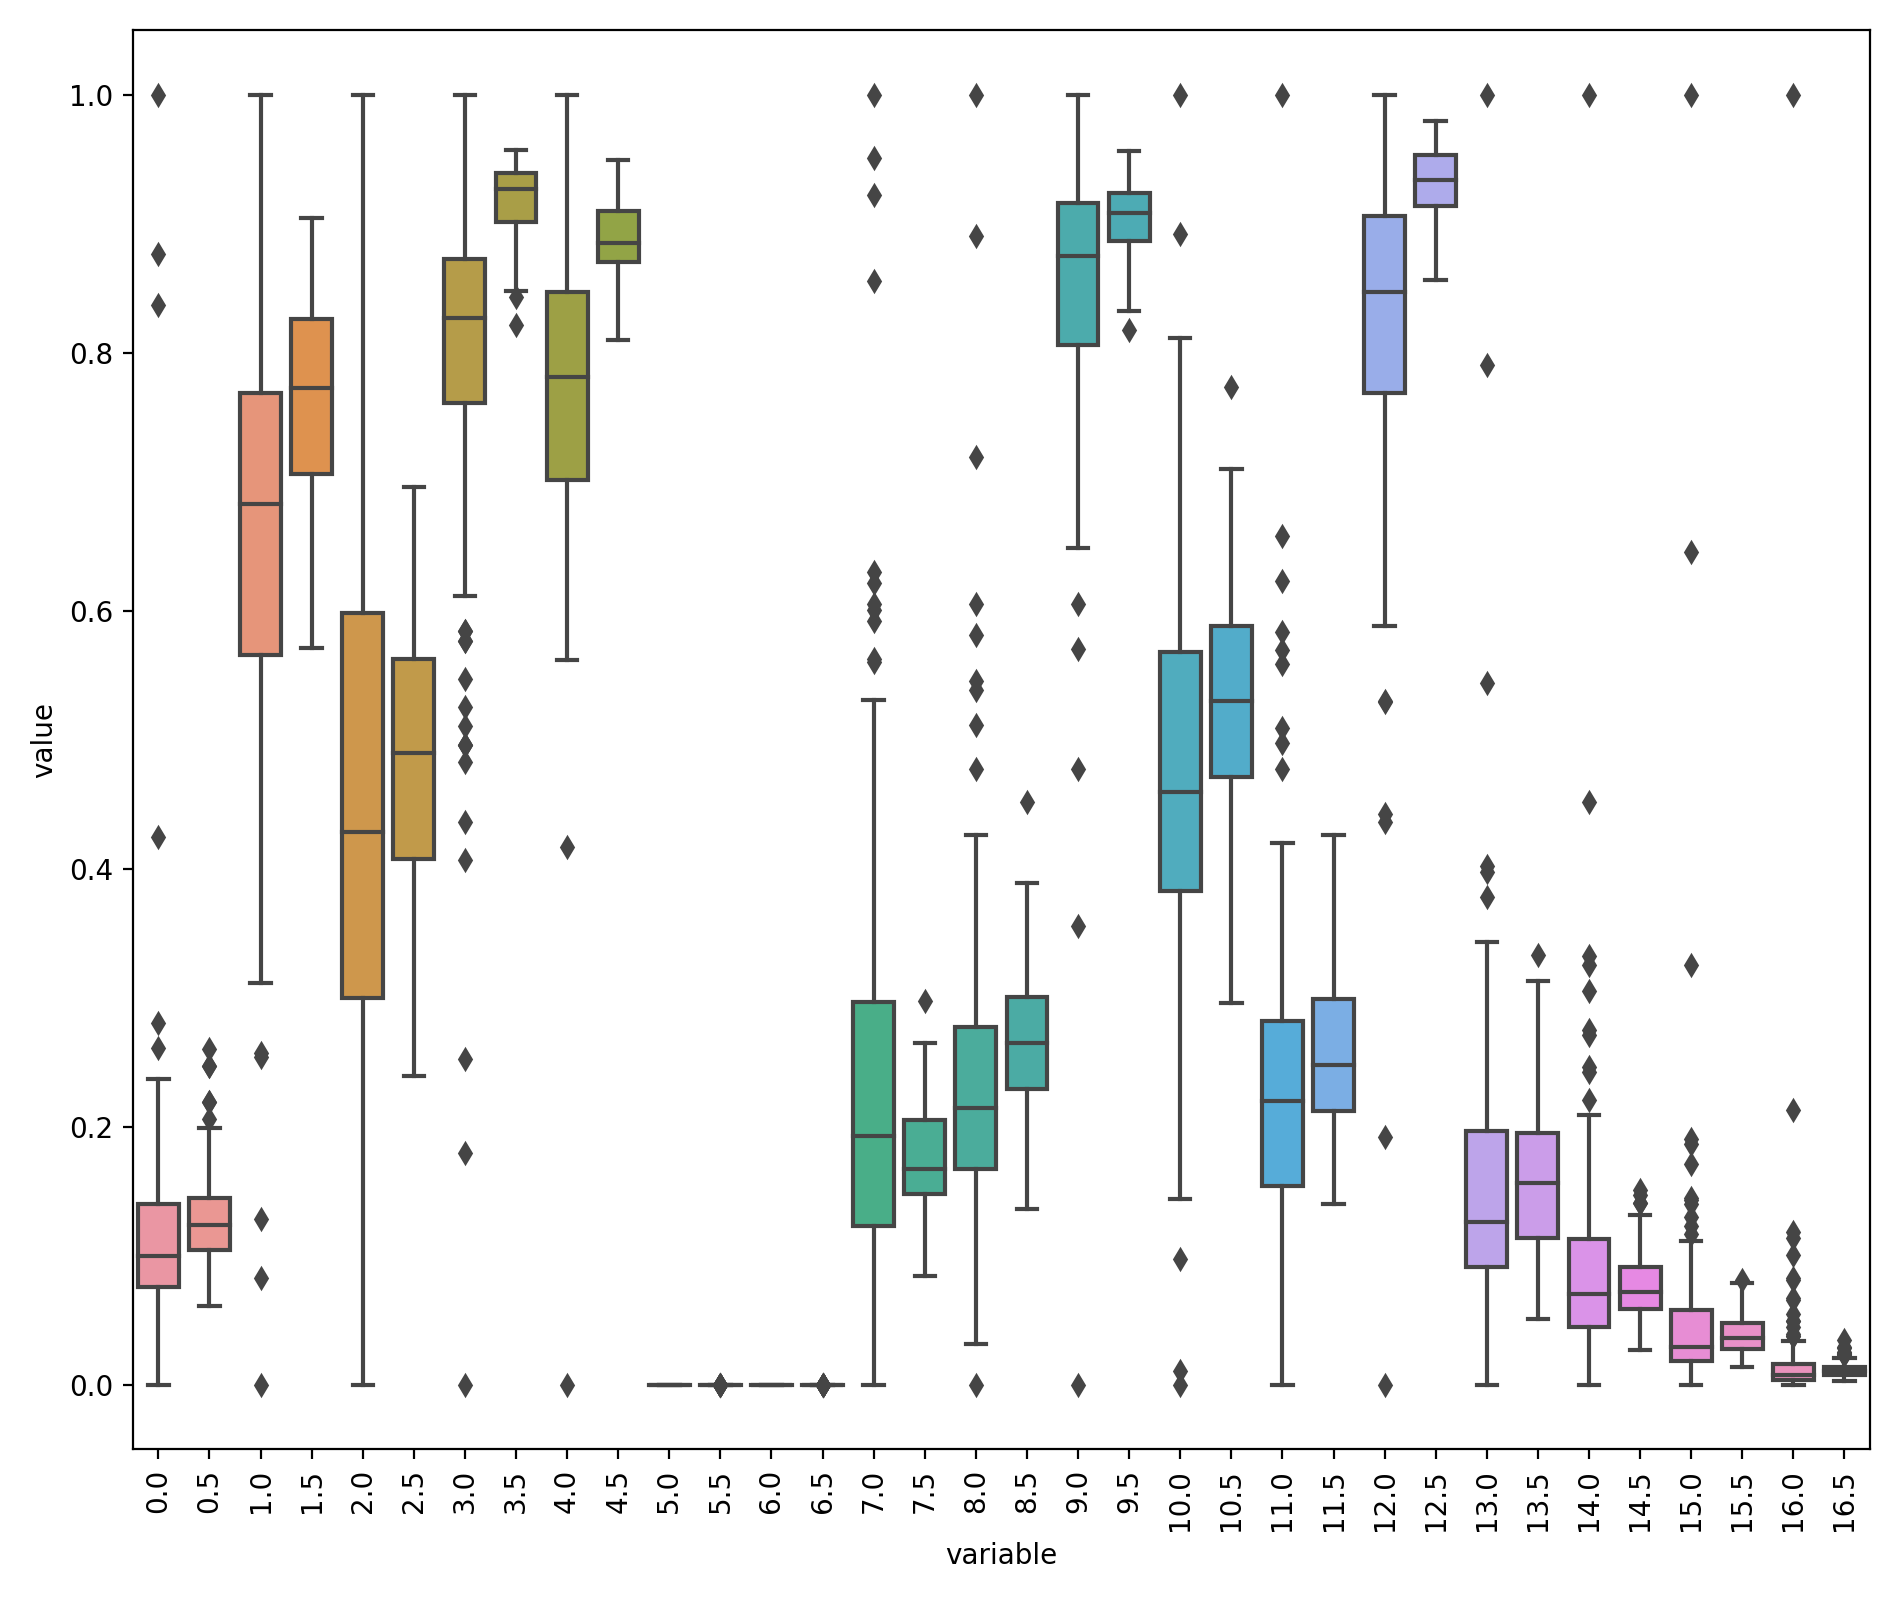

In [12]:
plot_lat_choice(df_16_features_choices[0][0])

<IPython.core.display.Javascript object>


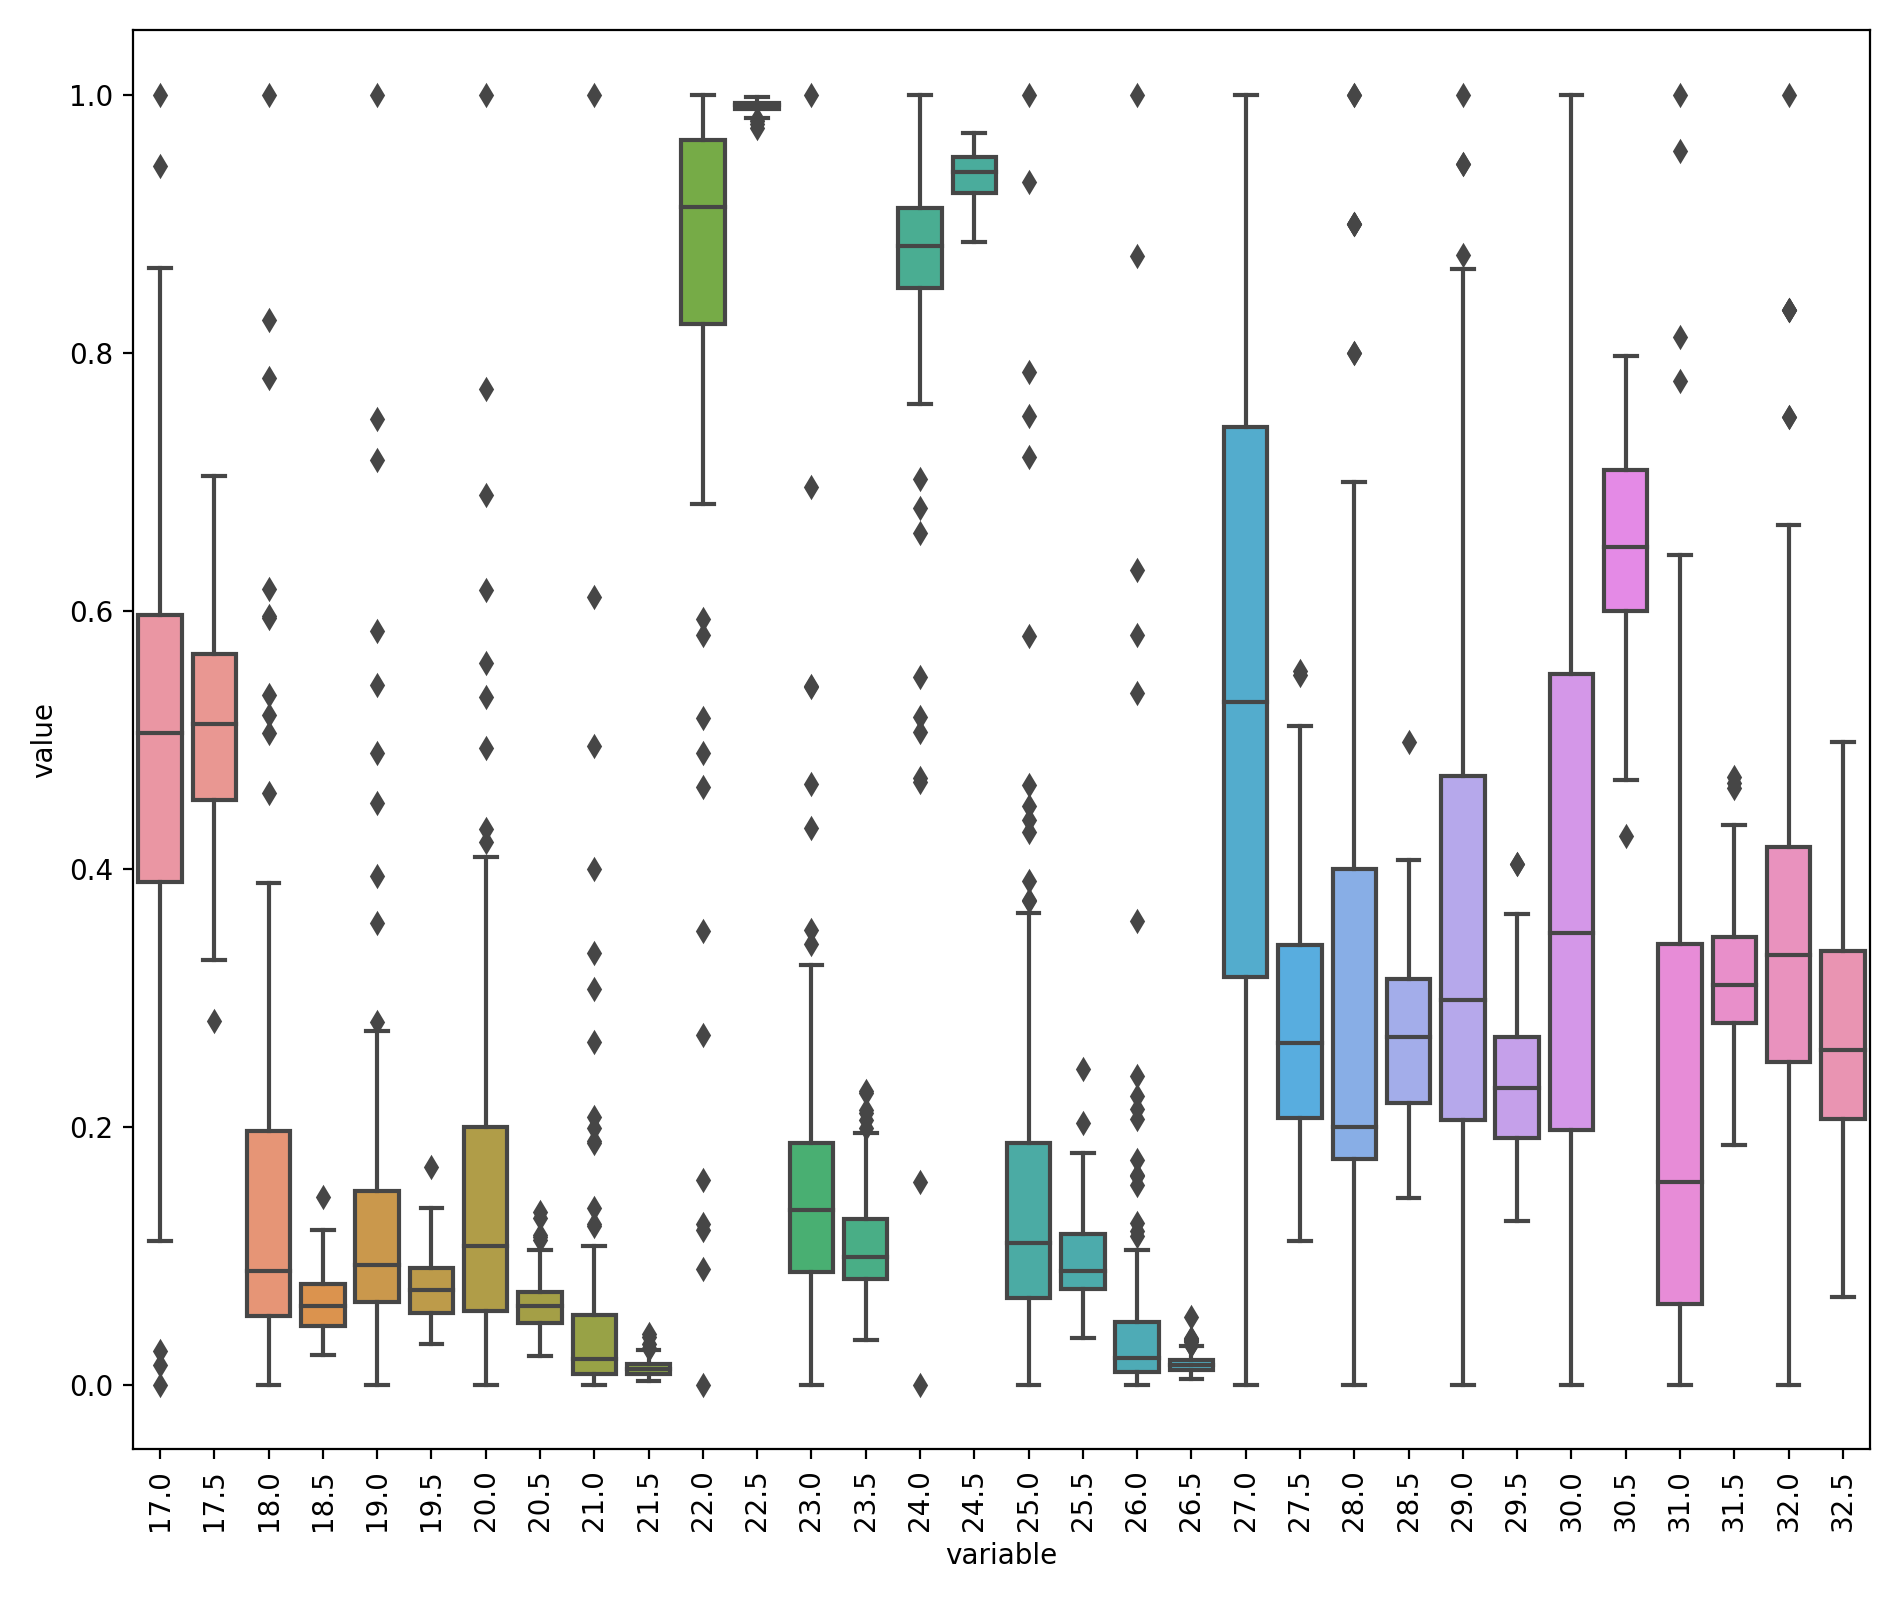

In [13]:
plot_lat_choice(df_16_features_choices[0][1])

<IPython.core.display.Javascript object>


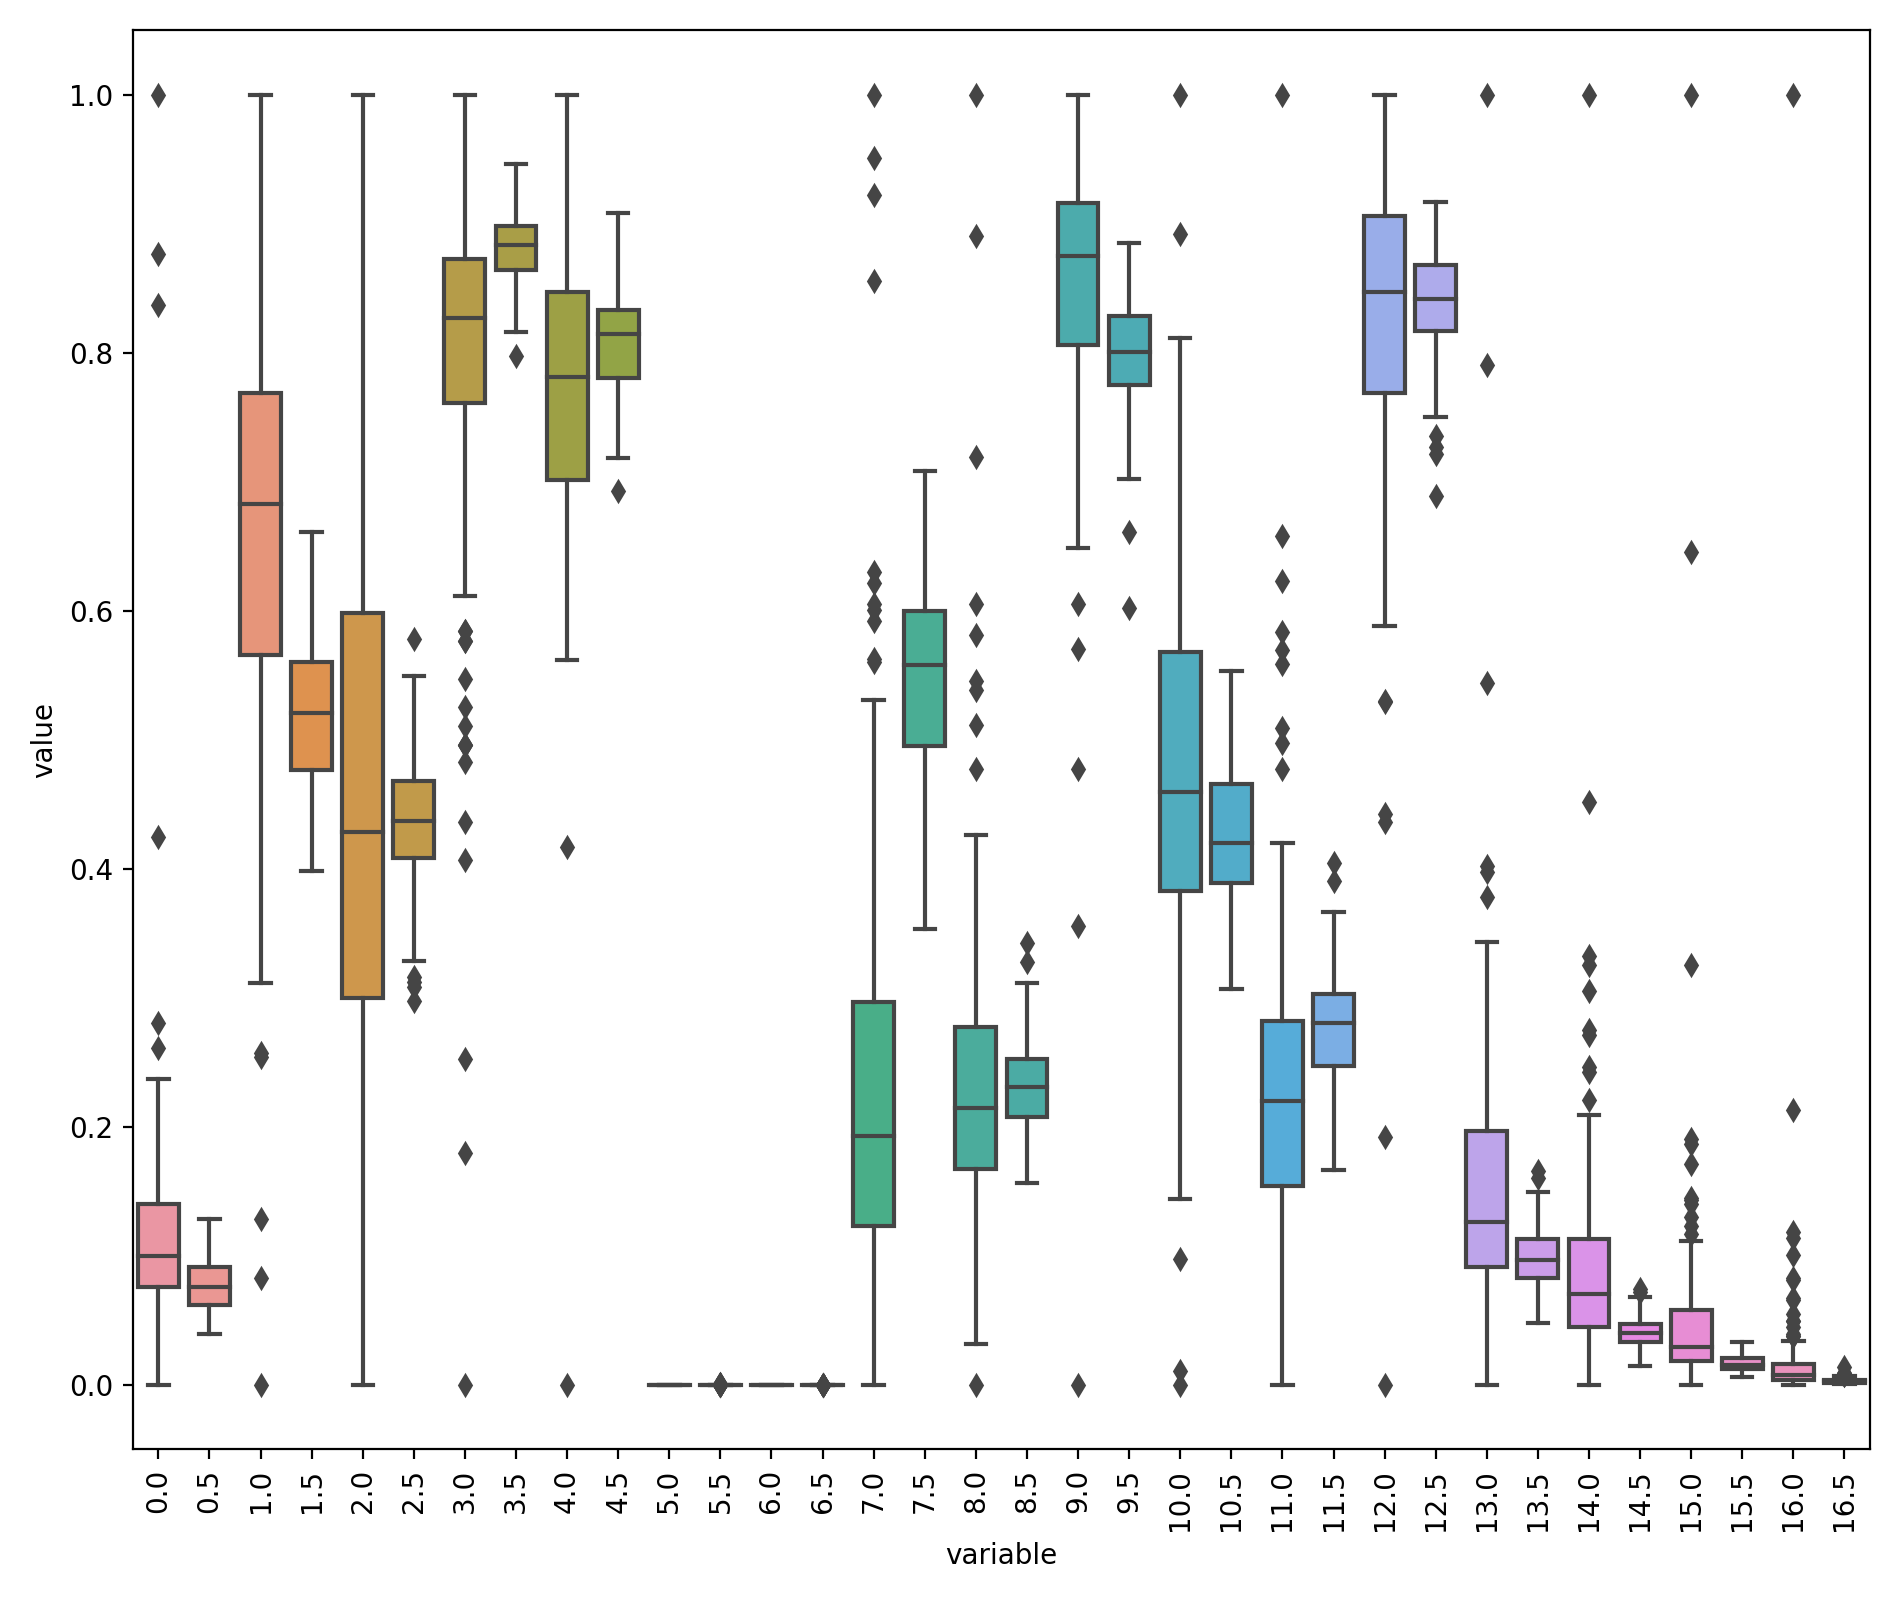

In [14]:
plot_lat_choice(df_16_features_choices[1][0])

<IPython.core.display.Javascript object>


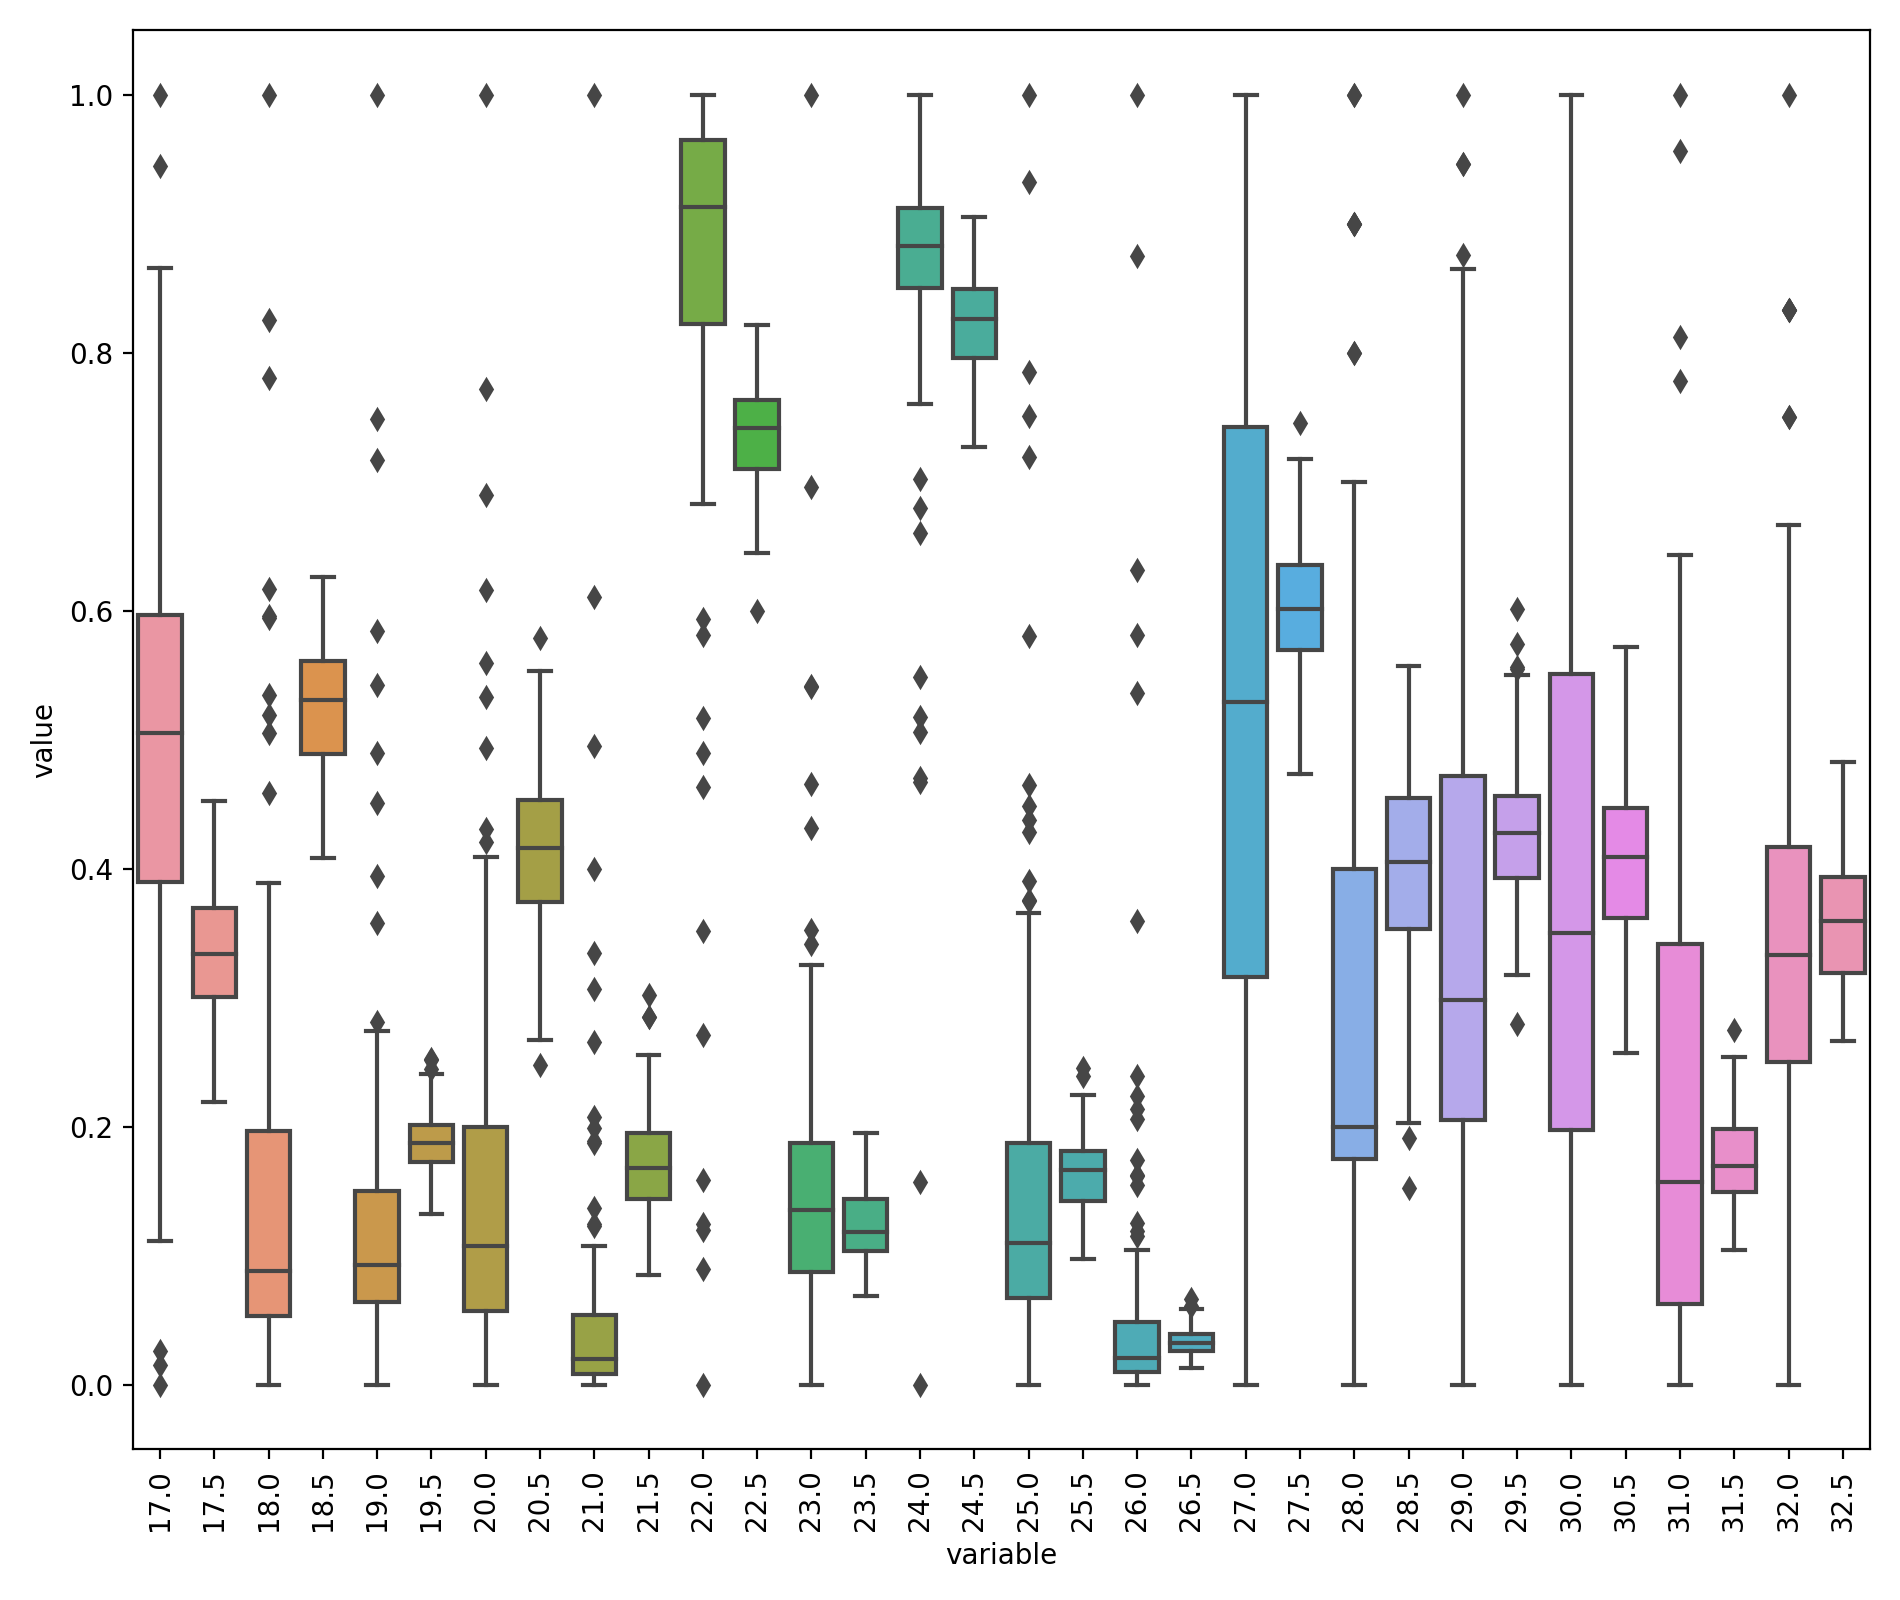

In [15]:
plot_lat_choice(df_16_features_choices[1][1])

<IPython.core.display.Javascript object>


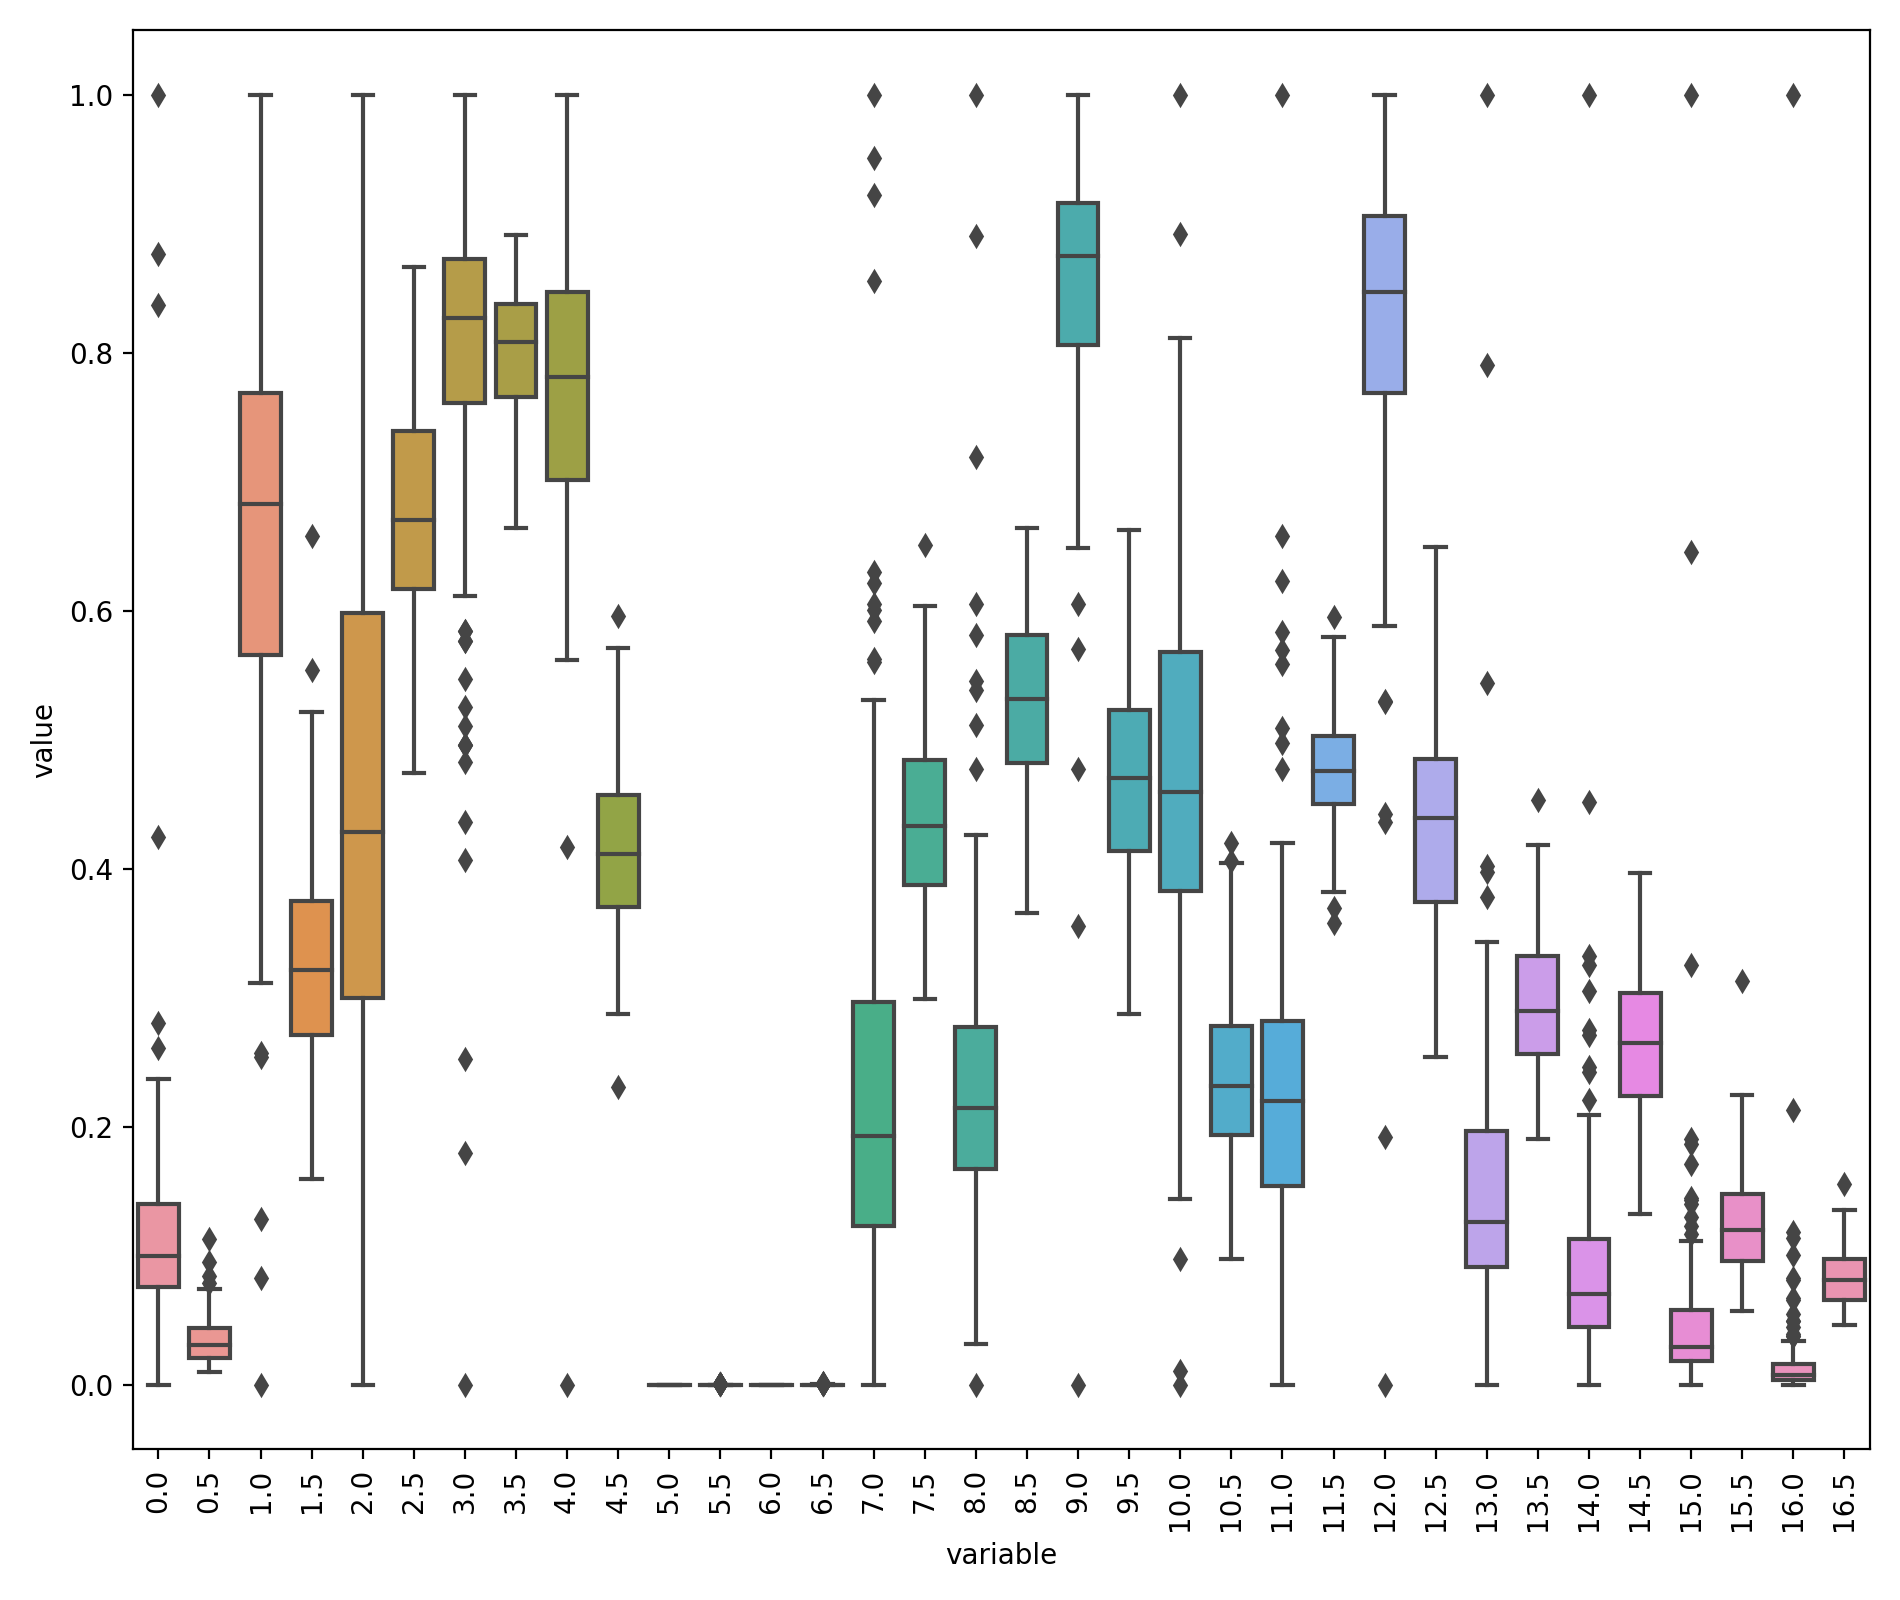

In [16]:
plot_lat_choice(df_16_features_choices[2][0])

<IPython.core.display.Javascript object>


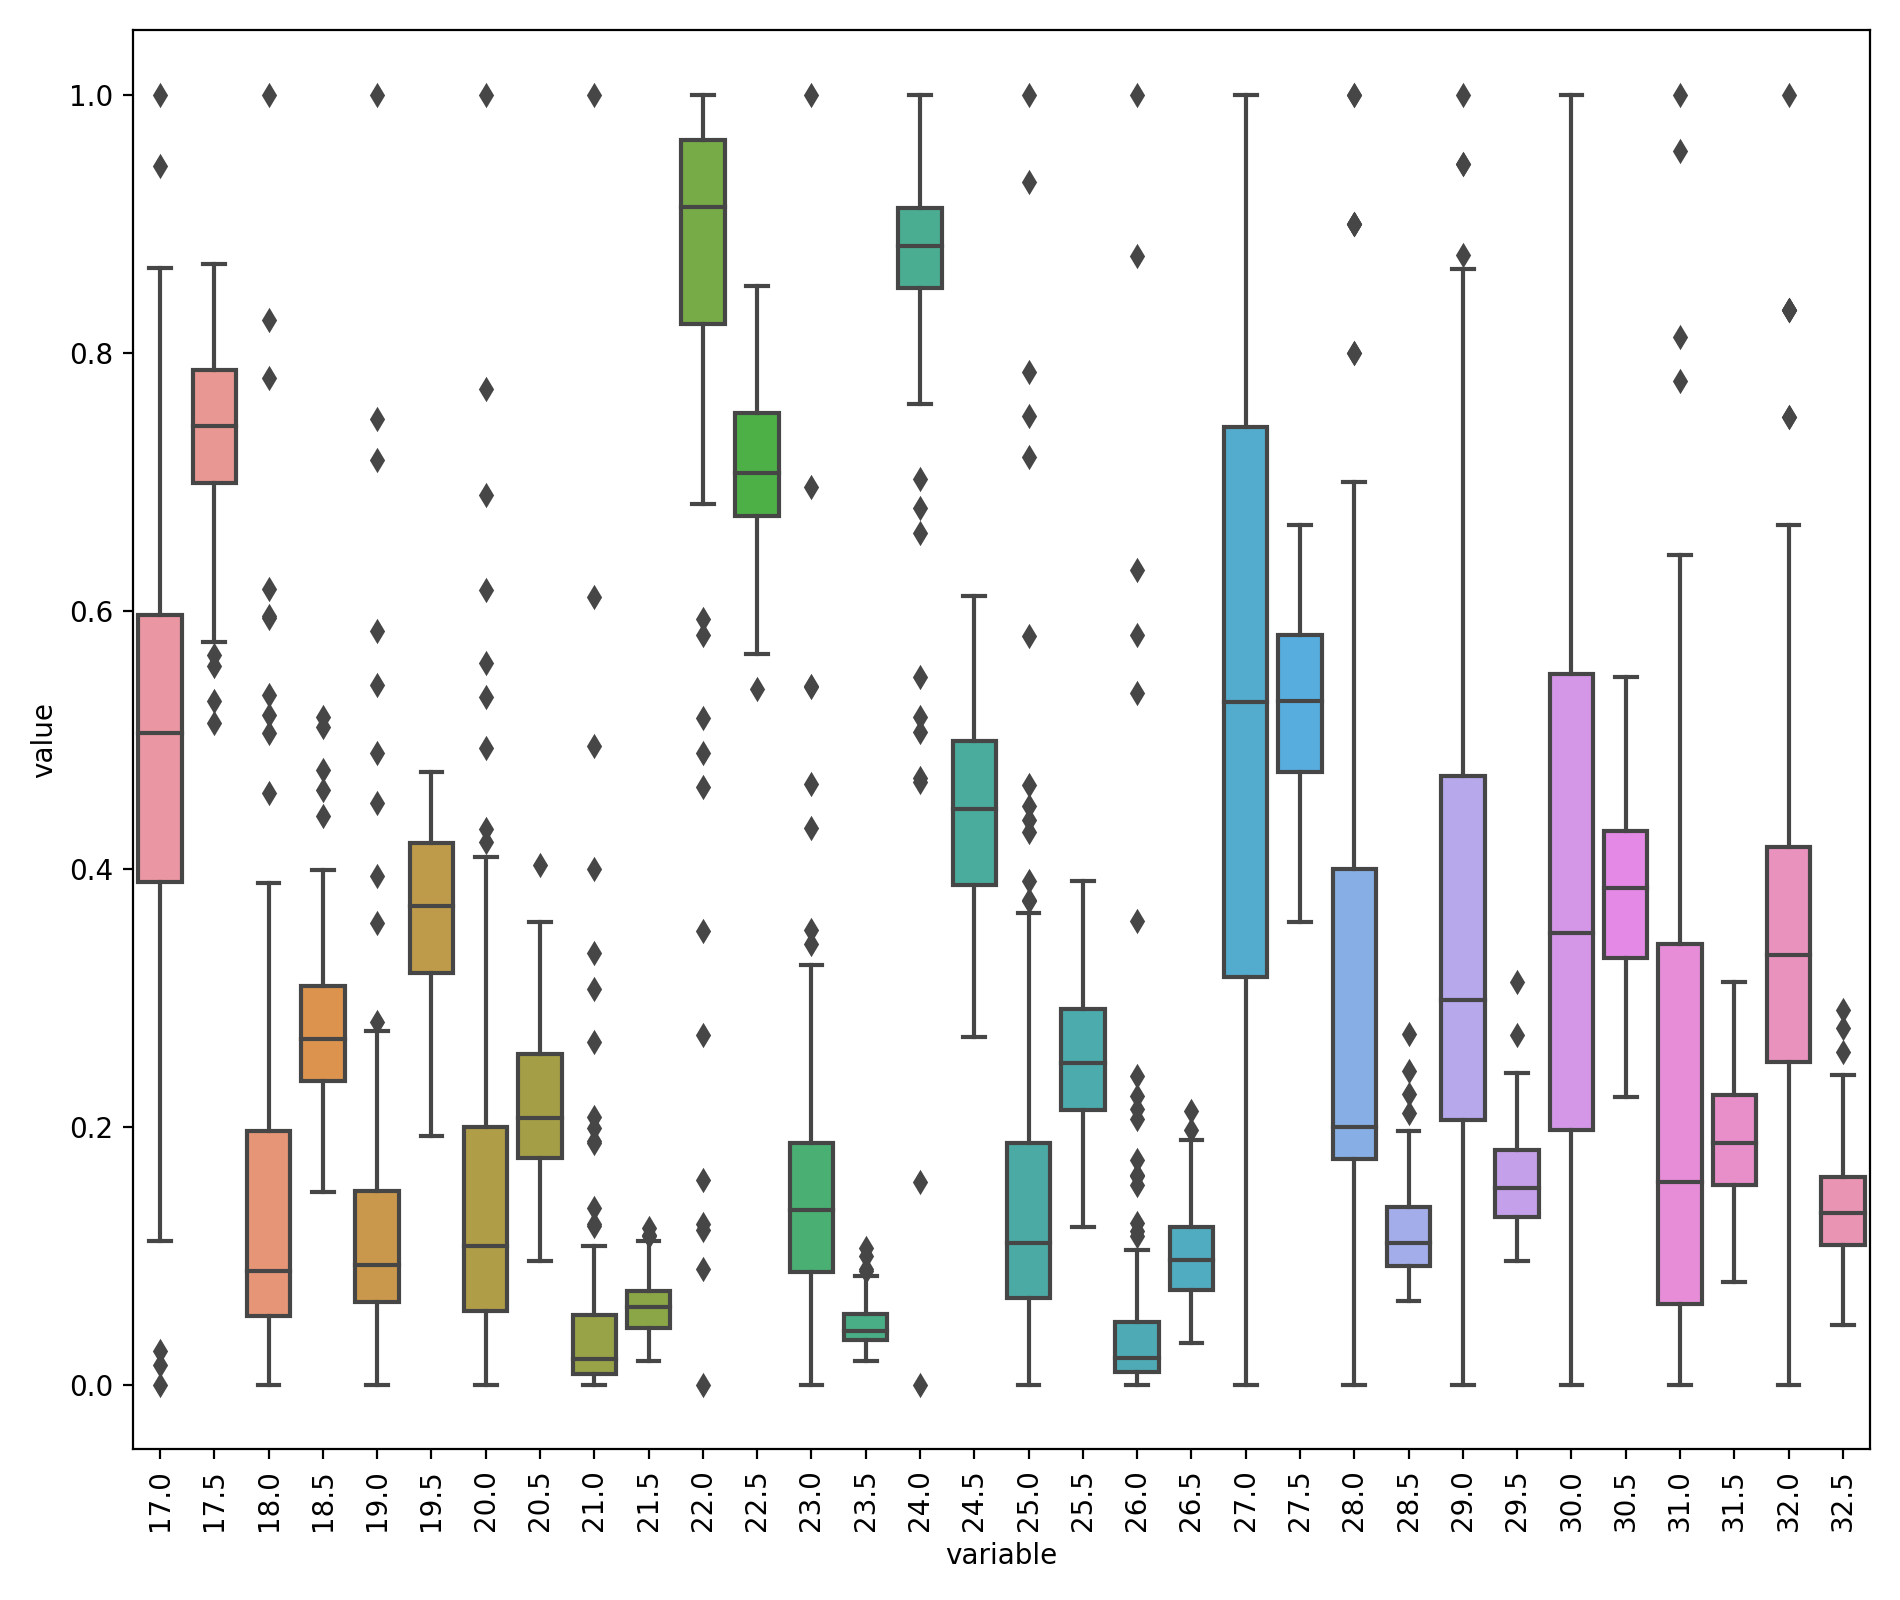

In [17]:
plot_lat_choice(df_16_features_choices[2][1])

<IPython.core.display.Javascript object>


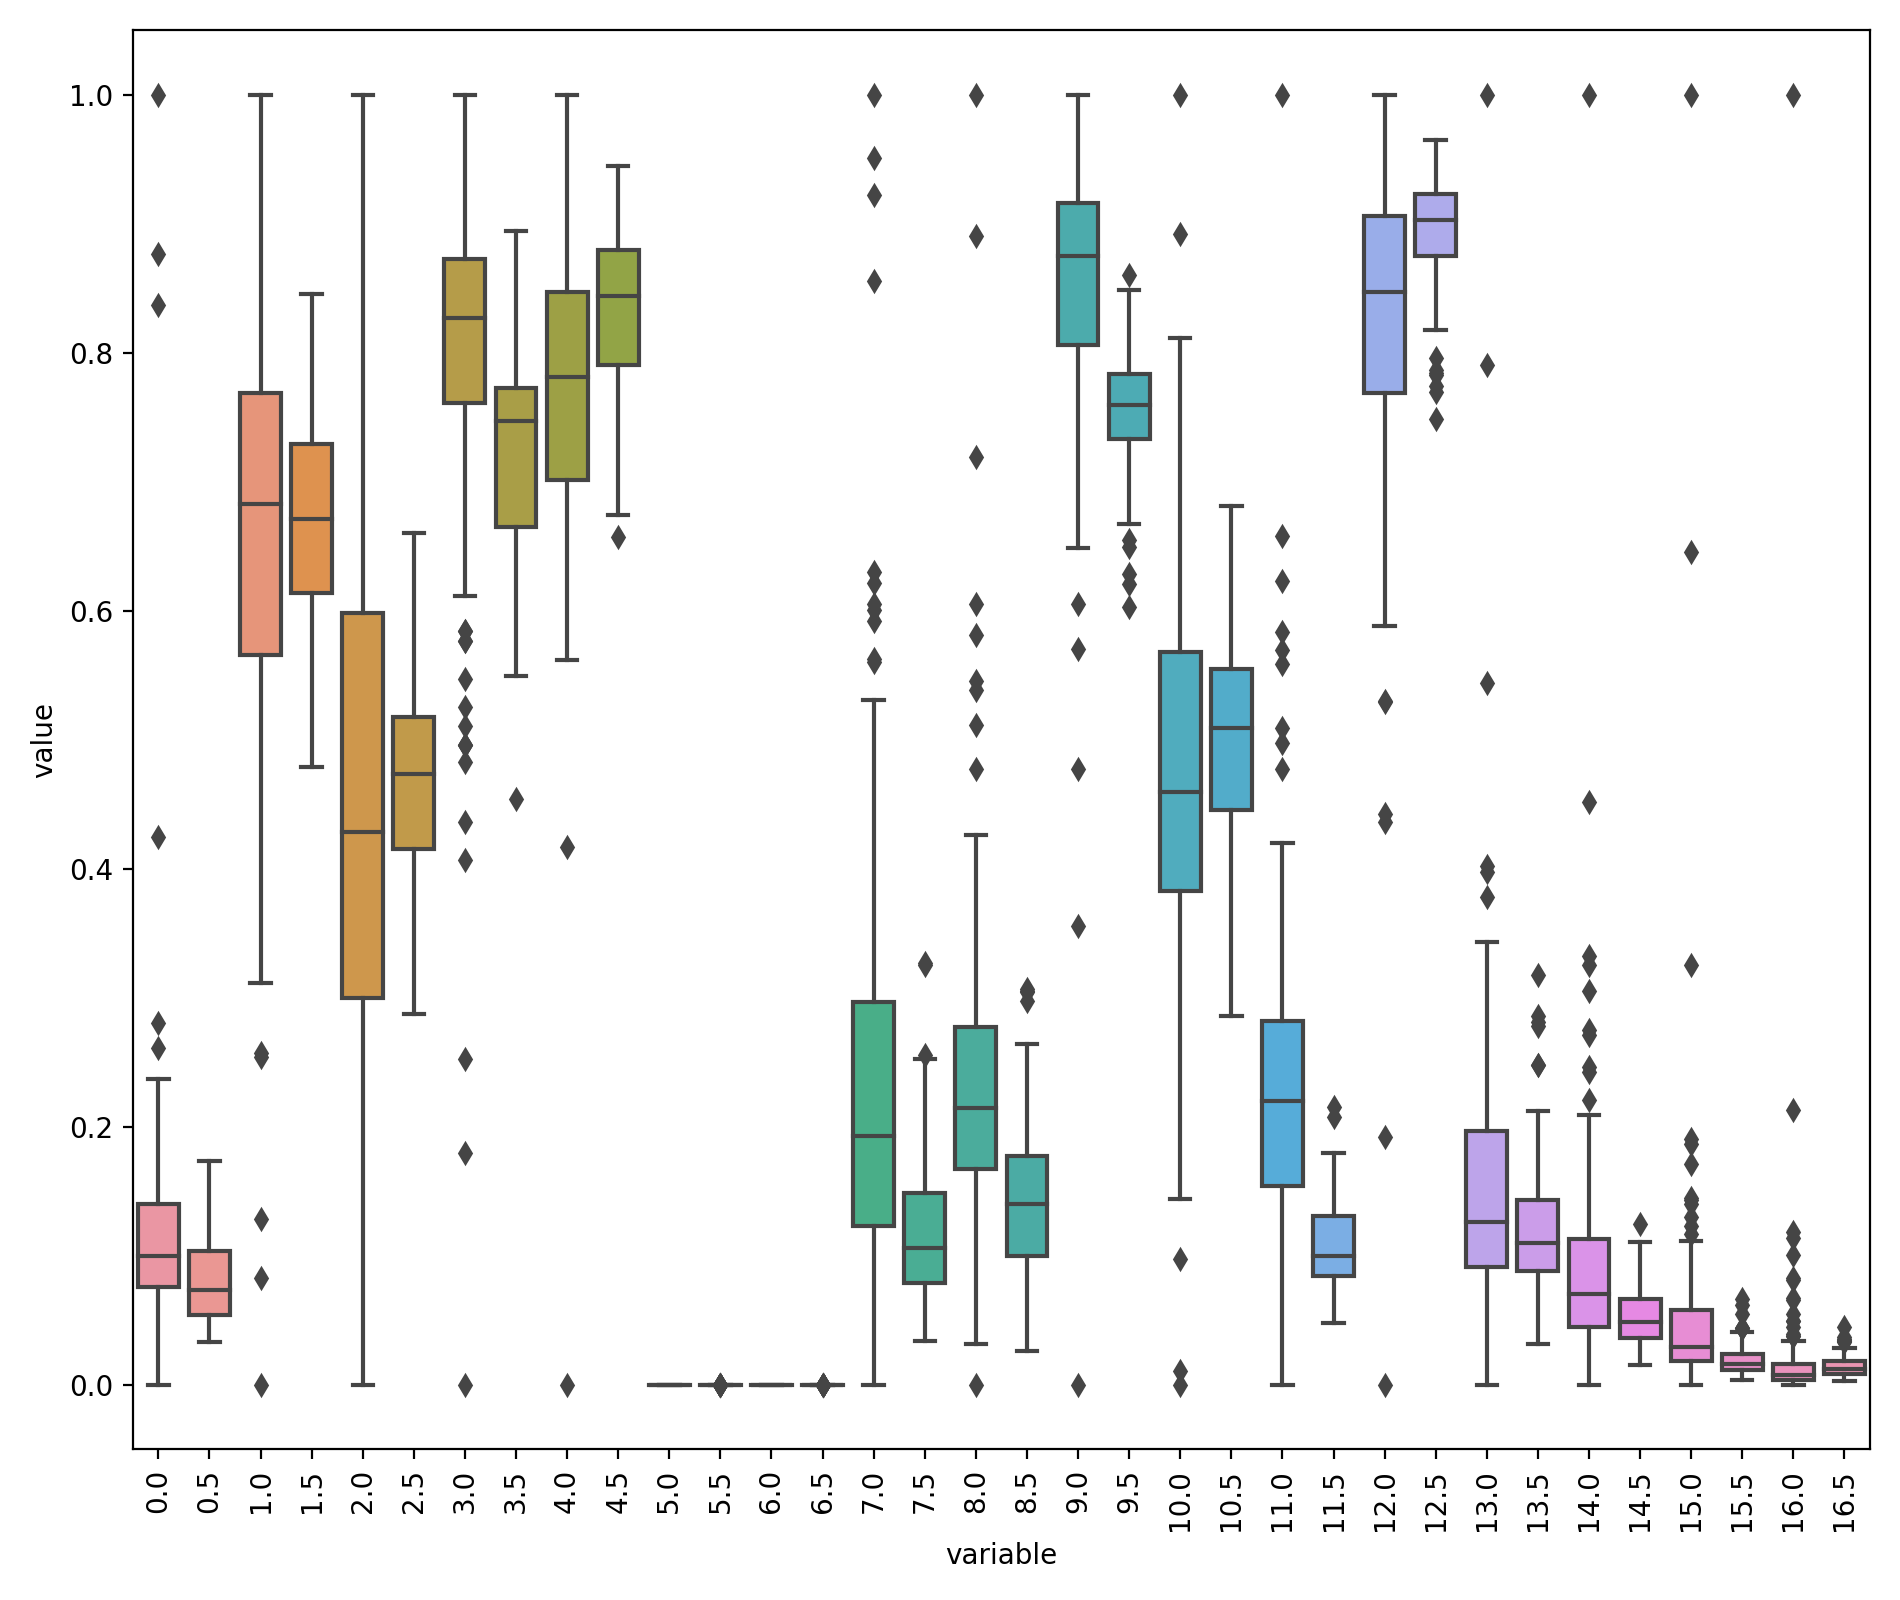

In [18]:
plot_lat_choice(df_16_features_choices[3][0])

<IPython.core.display.Javascript object>


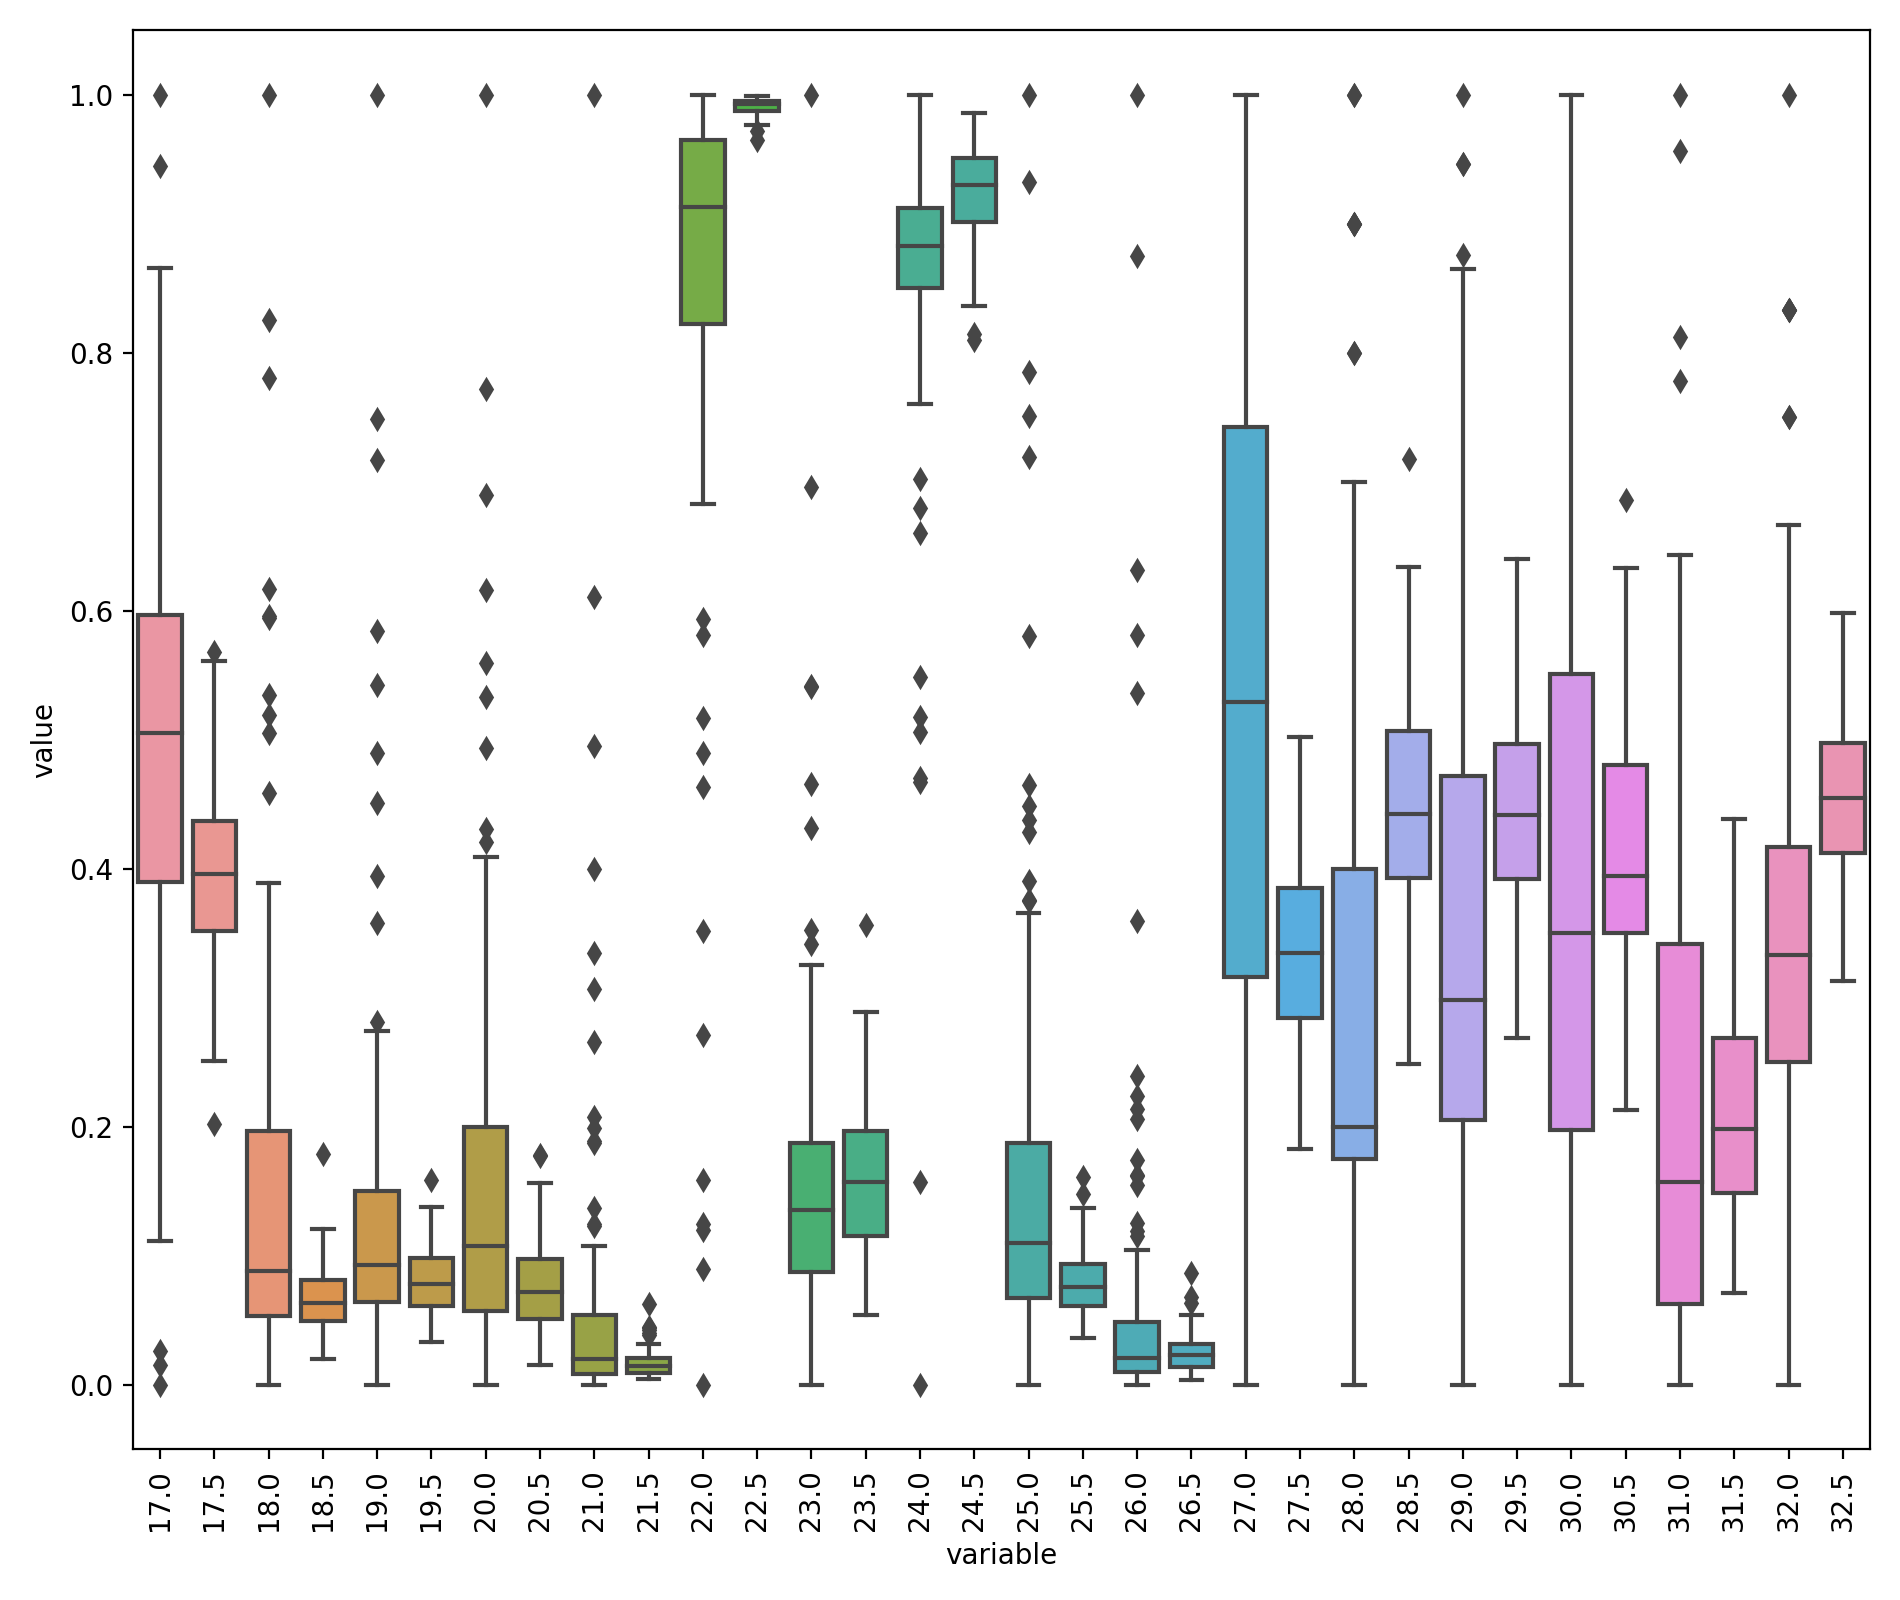

In [19]:
plot_lat_choice(df_16_features_choices[3][1])

<IPython.core.display.Javascript object>


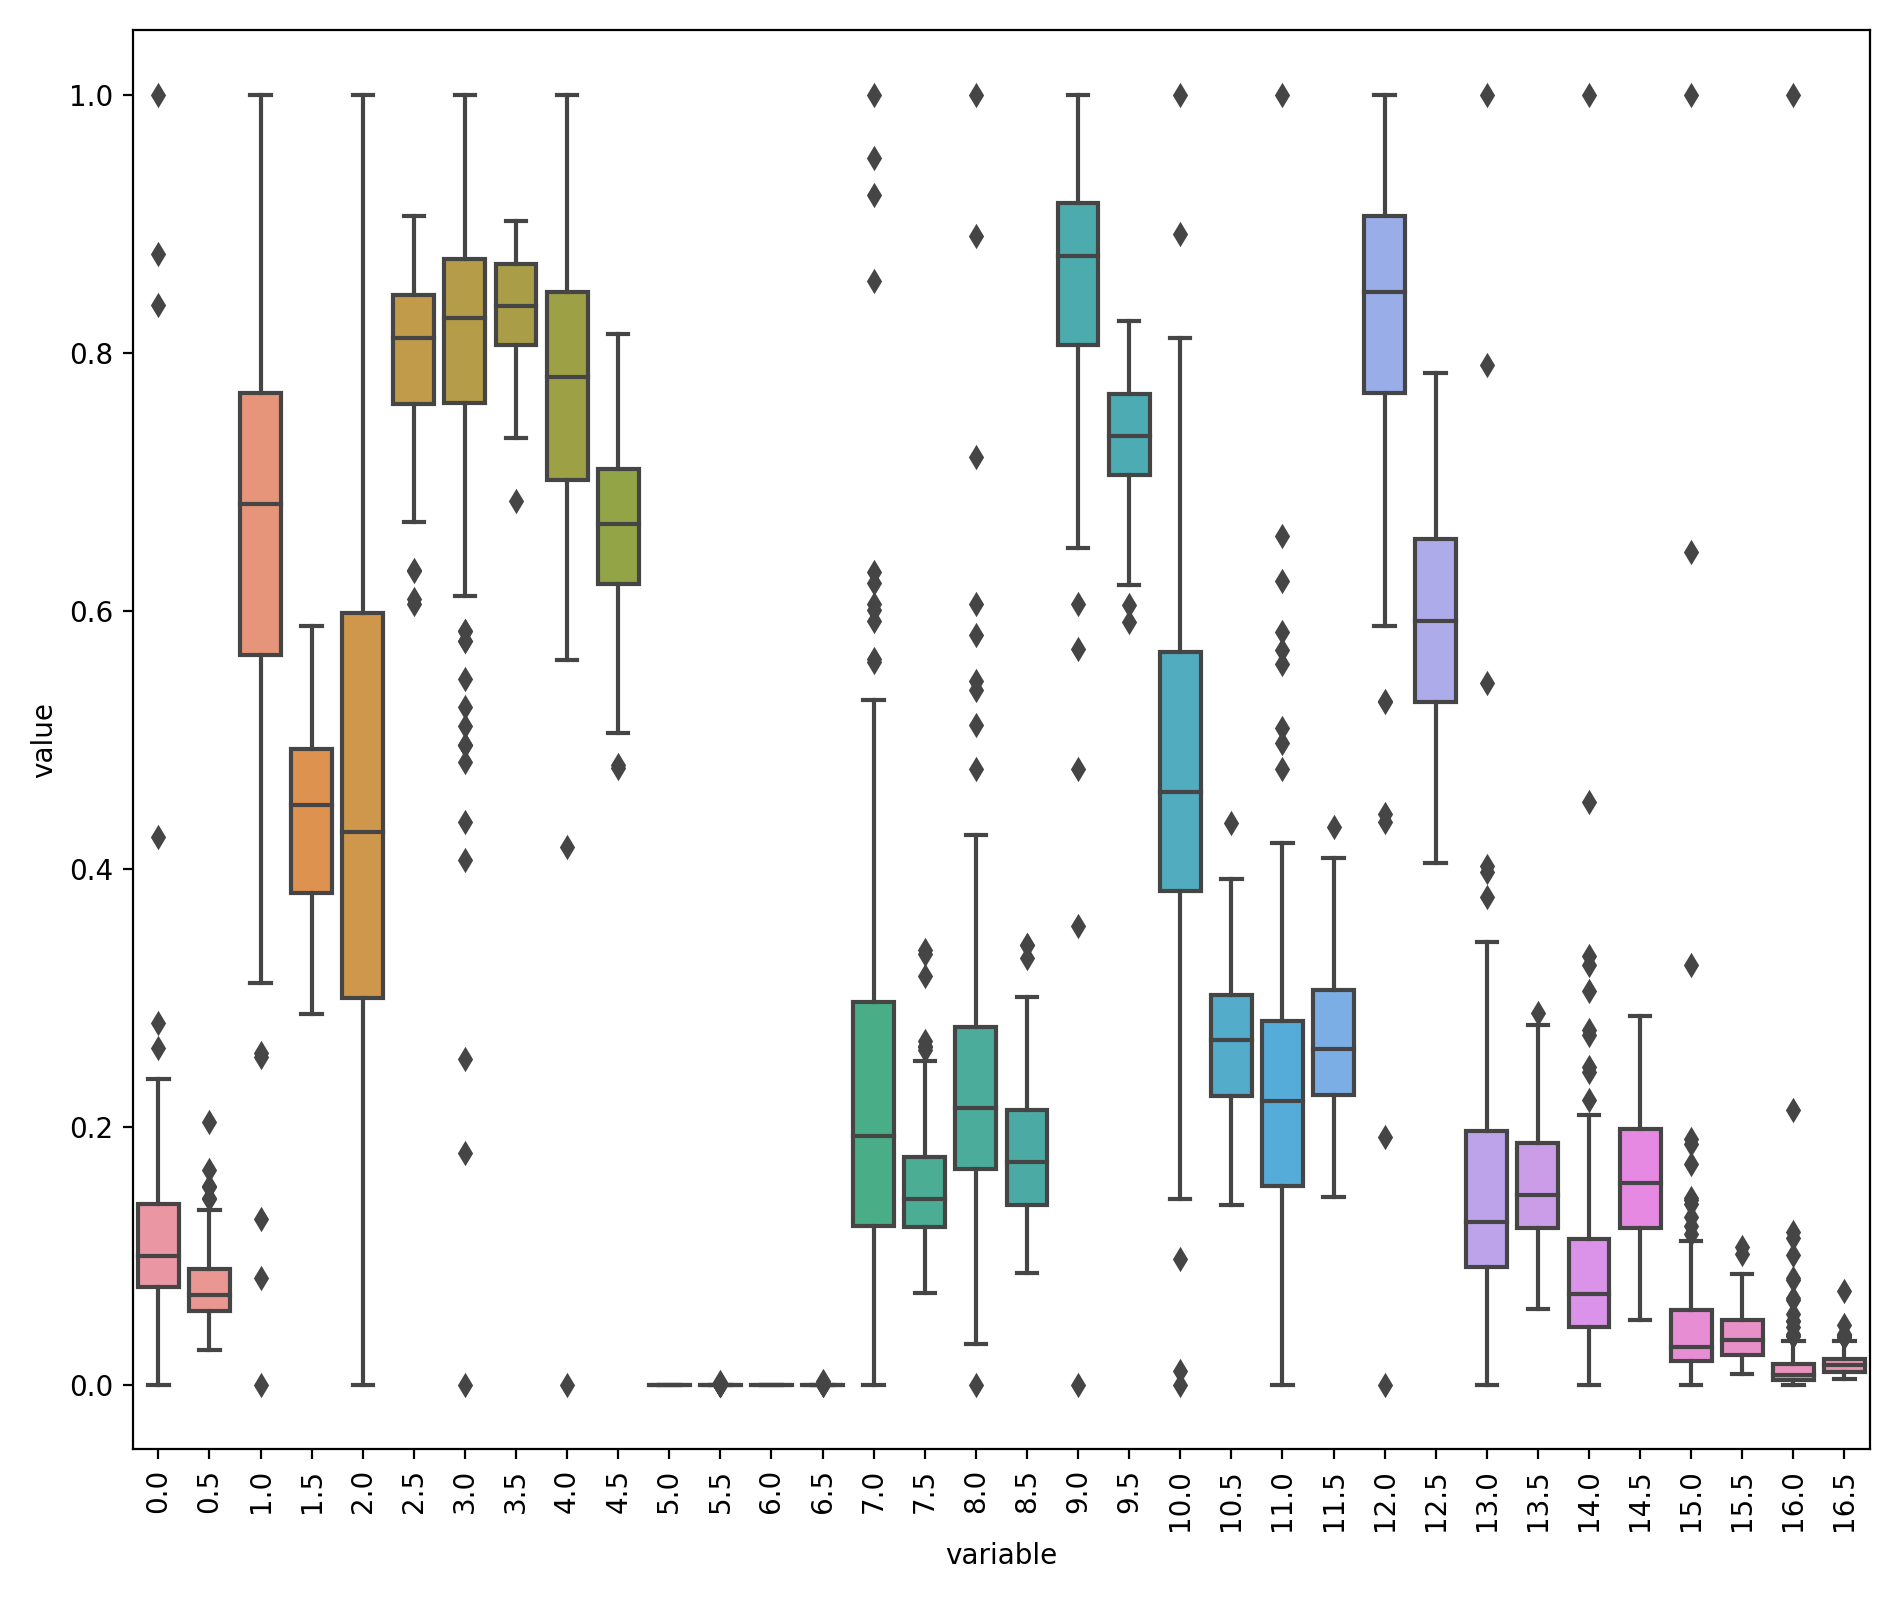

In [20]:
plot_lat_choice(df_16_features_choices[4][0])

<IPython.core.display.Javascript object>


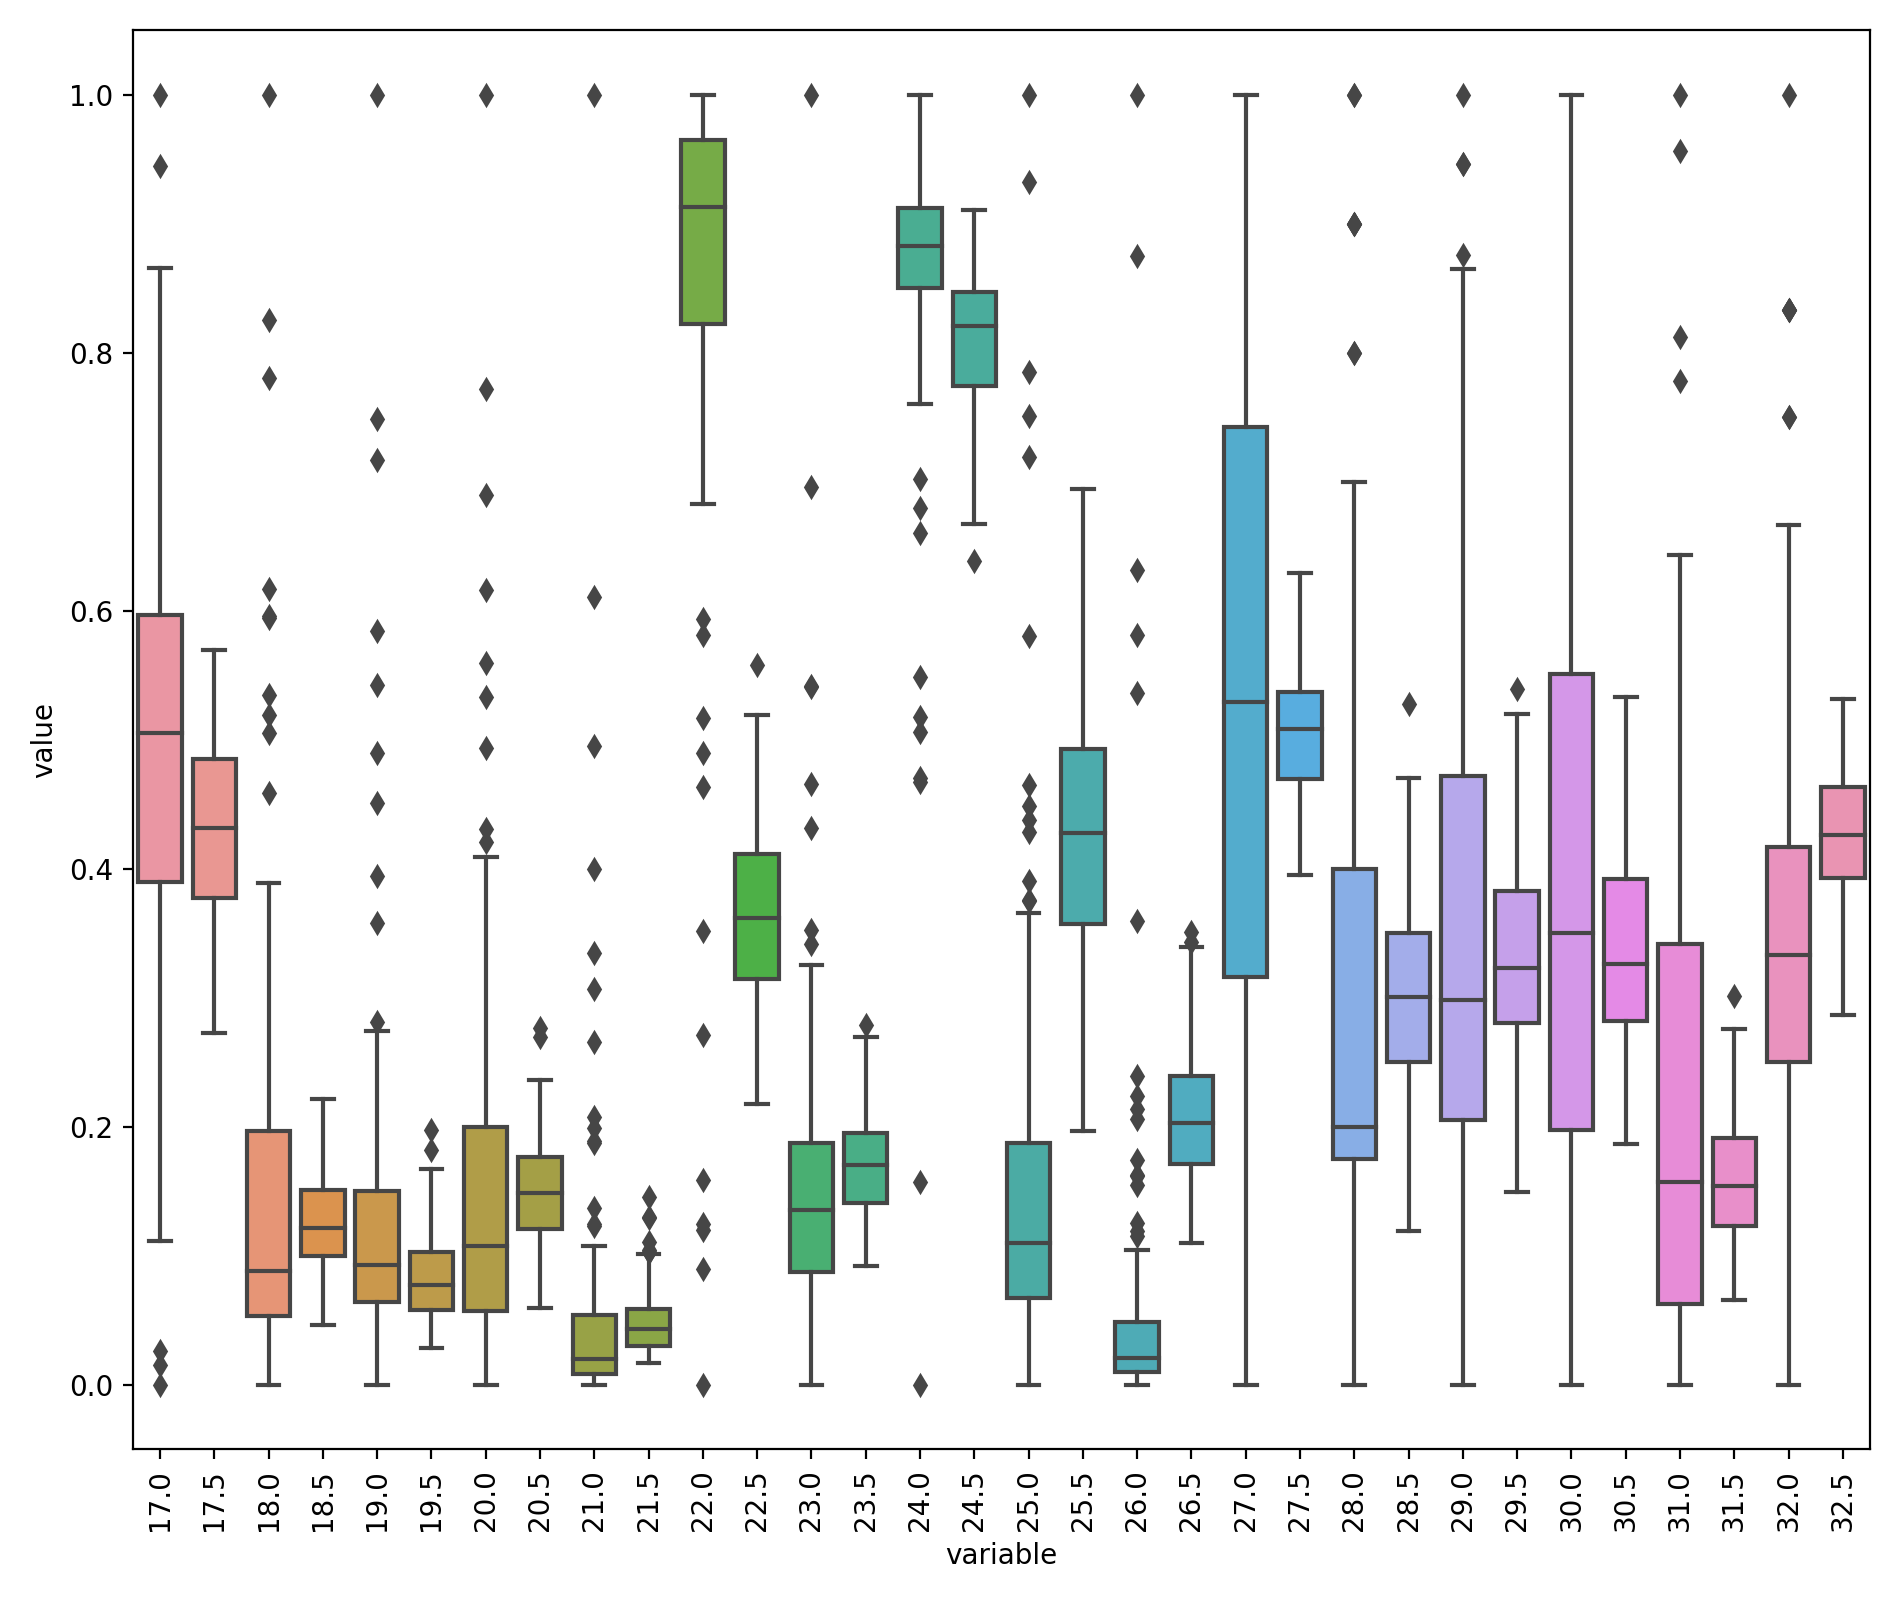

In [21]:
plot_lat_choice(df_16_features_choices[4][1])

<IPython.core.display.Javascript object>


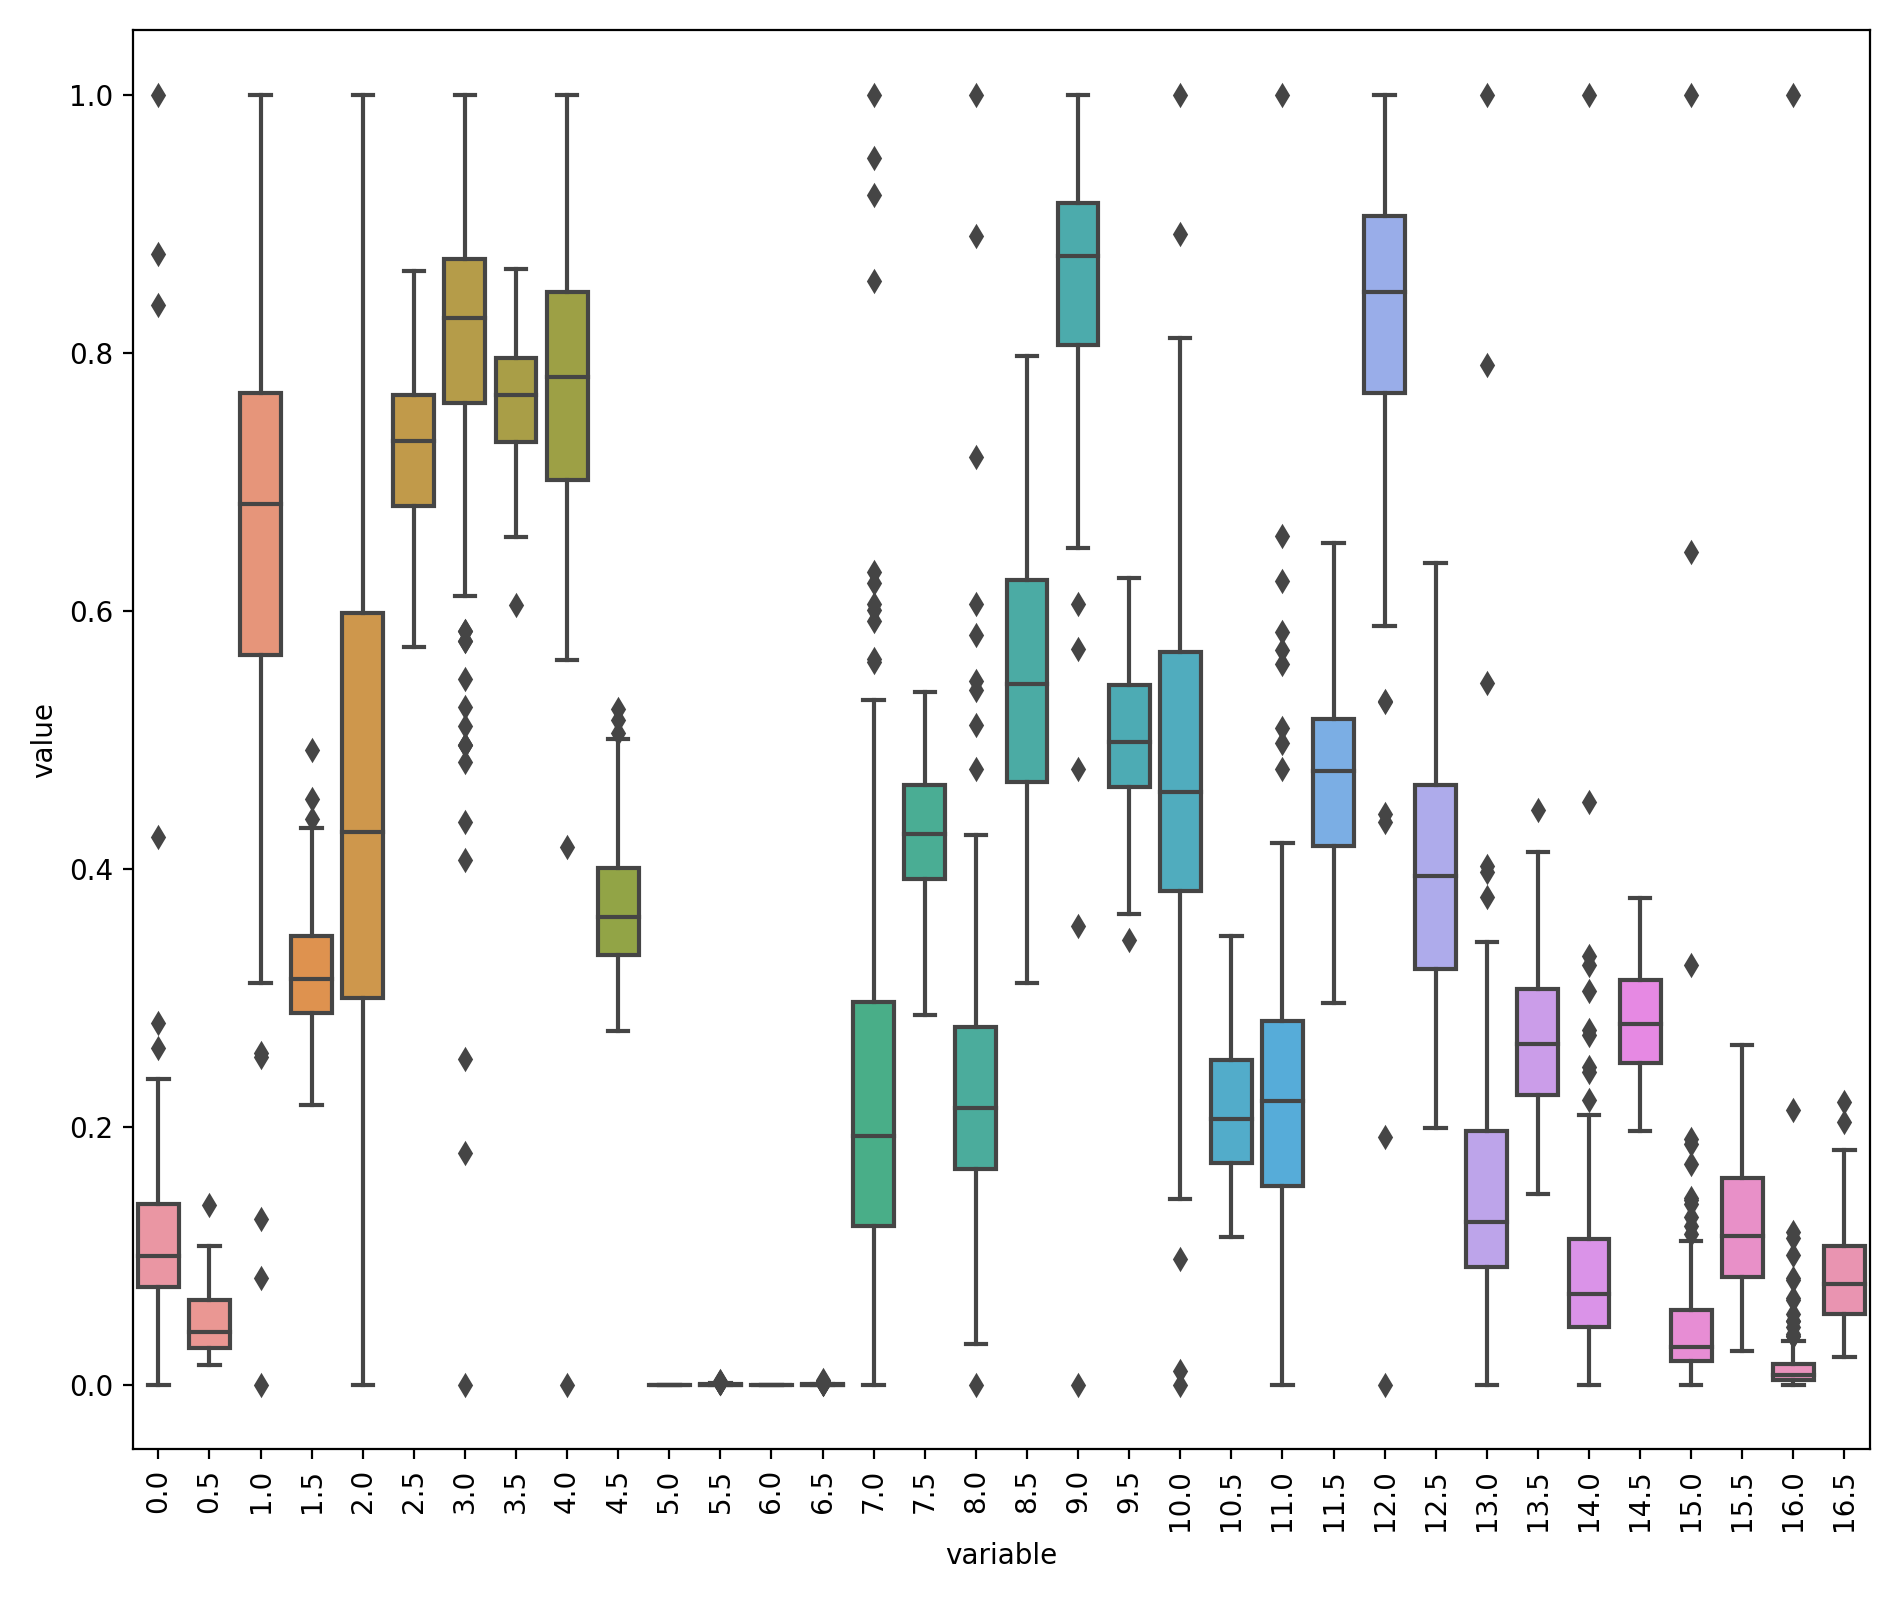

In [22]:
plot_lat_choice(df_16_features_choices[5][0])

<IPython.core.display.Javascript object>


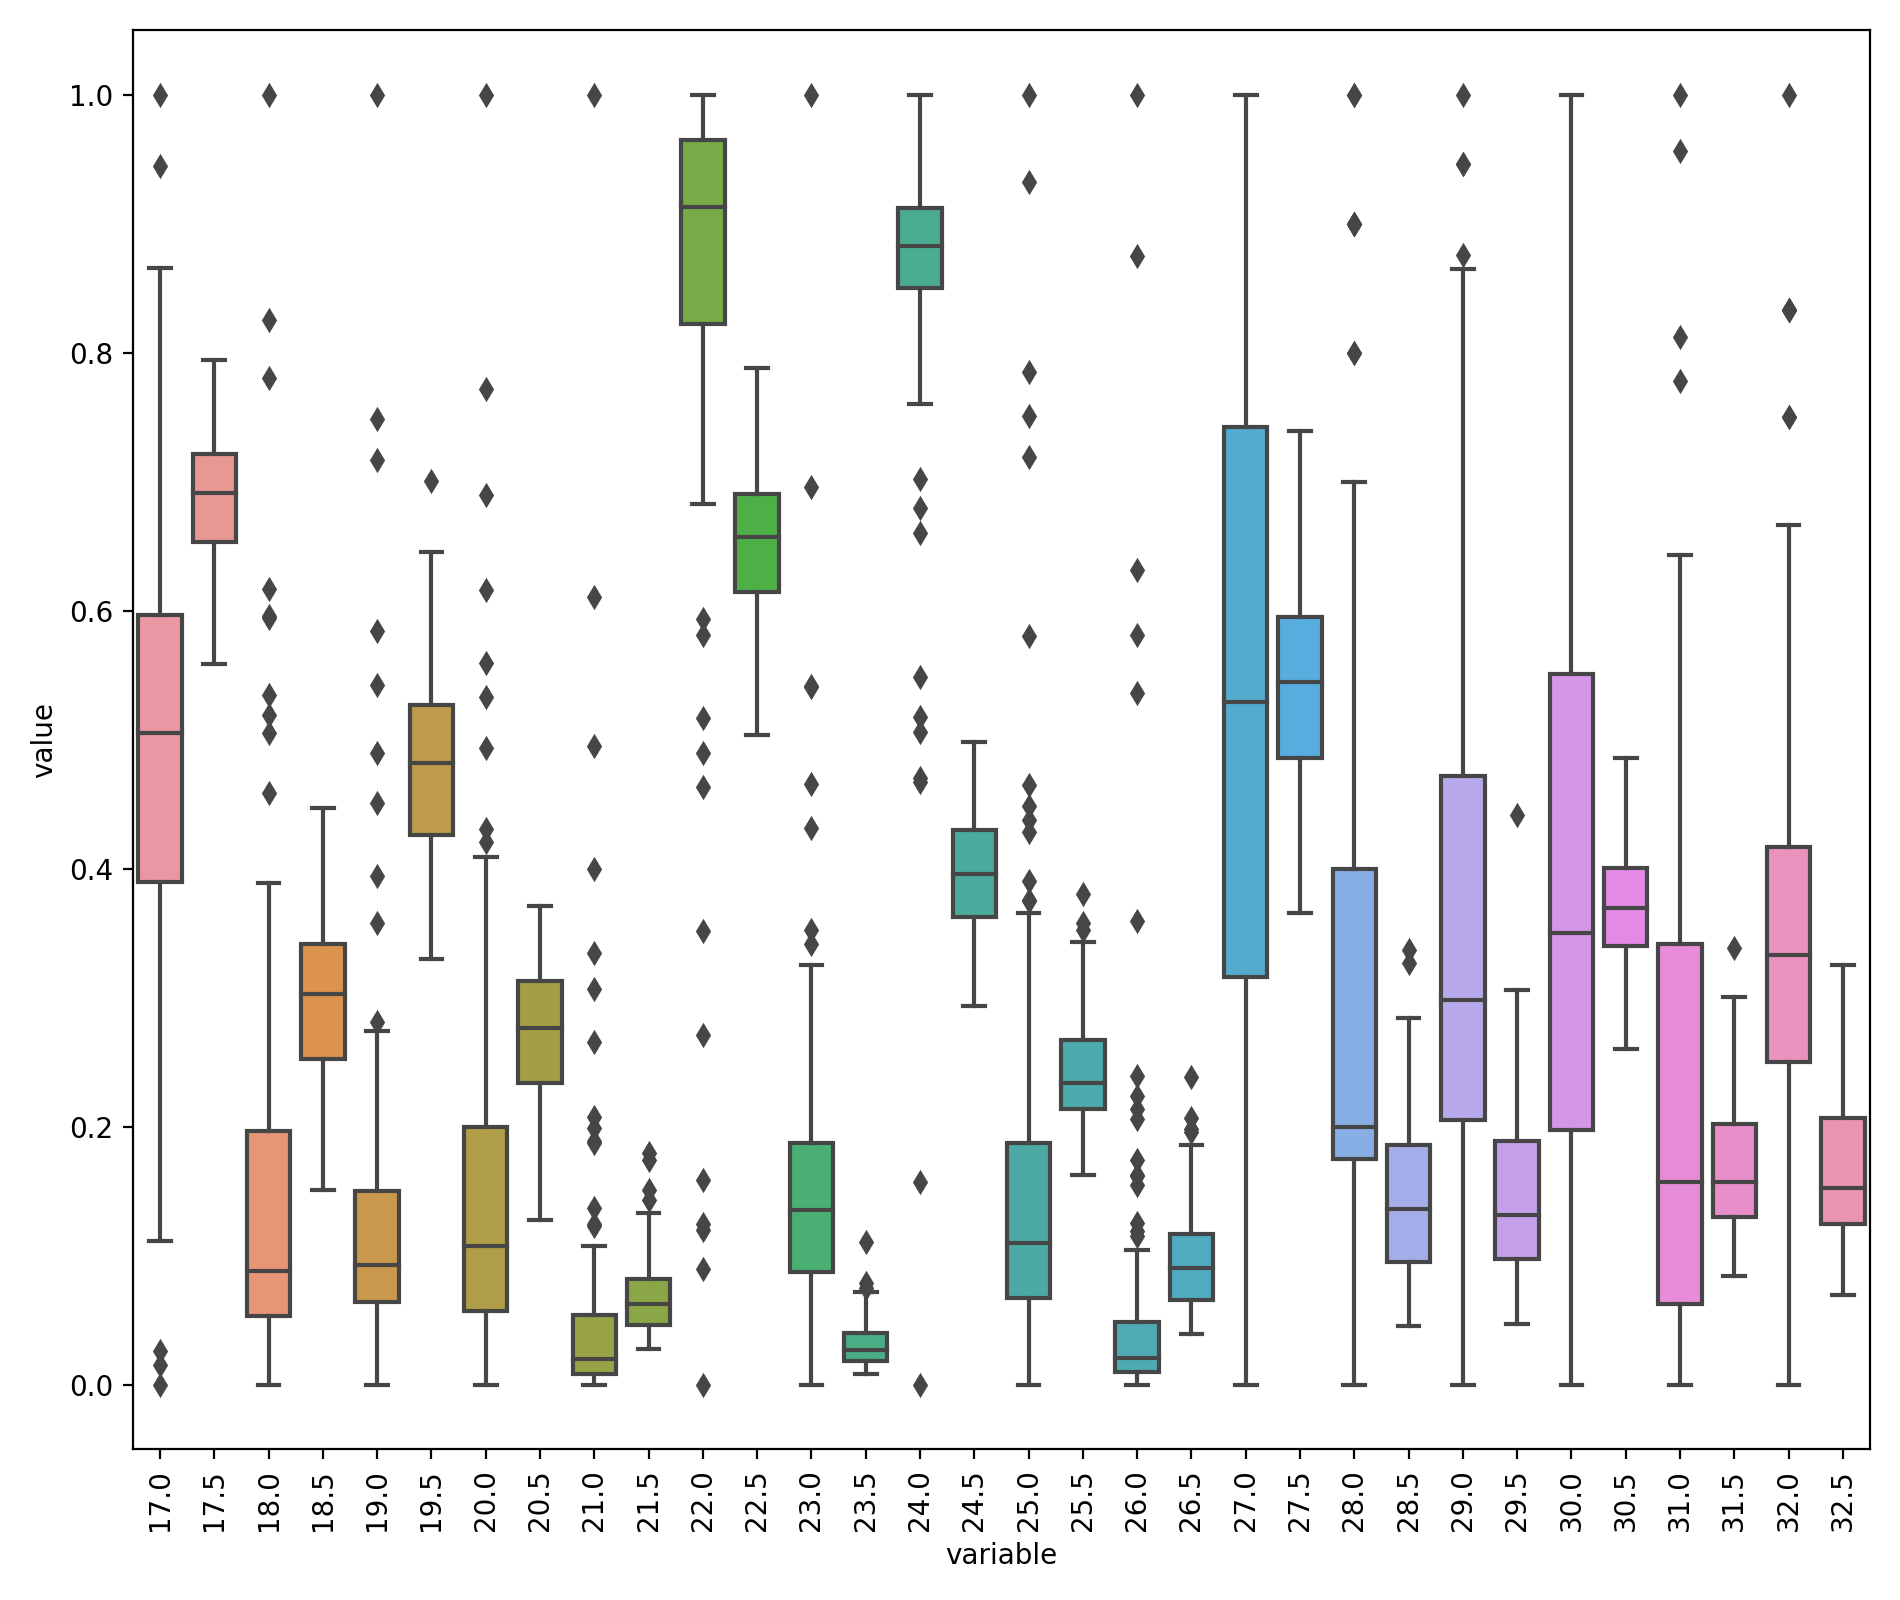

In [23]:
plot_lat_choice(df_16_features_choices[5][1])